# **MCO1 - Labor Force Survey 2016**

#### Group: **K-Means Business**

**Dy**, Harmony

**Hernandez**, Christa

**Sanchez**, Matthew

**Uy**, Justine

## Section 1. Introduction to the Problem/Task and Dataset

The dataset the group have chosen is Labor Force Survey 2016. This dataset mainly revolves around the employment and labor force participation of household members in the Philippines, while also capturing key demographic and socio-economic characteristics of the population. The target task is a **classification task** that aims to predict whether or not the respondent has done any work for at least one hour during the past week.

## Section 2. Description of the Dataset

<b>Description of the Dataset</b>

The Labor Force Survey (LFS), April 2016 data set describes the demographic and socio-economic characteristics of the population mainly through the estimation of levels of employment, unemployment, and underemployment in the 17 administrative regions of the Philippines. It aims to provide a quantitative framework for the preparation of plans and formulation of policies affecting the labor market.

<b> Data Collection </b>

The data collection was conducted face-to-face within a total national sample of 42,768 sample households (rounds with Batanes sample) or 42,576 sample households (rounds without Batanes sample) per survey round (quarterly in a year). This specific data set was collected from April 8, 2016 until April 30, 2016. To ensure the data set had proportional representation among the samples, the PSA designed a master sample which ensures a randomly assigned and selected set of geographic areas with non-overlapping and discernable boundaries known as PSUs. 

As the data collection method utilized a randomized sampling approach, the data collected is well representative of the national and regional statistics. With their systematic survey execution, a high-response rate of 95.7% was achieved which minimizes nonresponse bias.

However, due to the survey only including participants from private households and excluding people from the institutional population, the survey might potentially be underestimating labor force statistics and creating less accurate results.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("STINTSY_MCO1/PHL-PSA-LFS-2016-Q2-PUF/LFS PUF April 2016.CSV")

display(df.head())
display(df.info())

,PUFREG,PUFPRV,PUFPRRCD,PUFHHNUM,PUFURB2K10,PUFPWGTFIN,PUFSVYMO,PUFSVYYR,PUFPSU,PUFRPL,...,PUFC33_WEEKS,PUFC34_WYNOT,PUFC35_LTLOOKW,PUFC36_AVAIL,PUFC37_WILLING,PUFC38_PREVJOB,PUFC40_POCC,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT
0,1,28,2800,1,2,405.2219,4,2016,217,1,...,,,,,,,,1,01,1
1,1,28,2800,1,2,388.8280,4,2016,217,1,...,,,,,,,,1,01,1
2,1,28,2800,1,2,406.1194,4,2016,217,1,...,,,,,,,,1,01,1
3,1,28,2800,2,2,405.2219,4,2016,217,1,...,,,,,,,,1,01,1
4,1,28,2800,2,2,384.3556,4,2016,217,1,...,,,,,,,,1,96,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180862 entries, 0 to 180861
Data columns (total 50 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PUFREG           180862 non-null  int64  
 1   PUFPRV           180862 non-null  int64  
 2   PUFPRRCD         180862 non-null  int64  
 3   PUFHHNUM         180862 non-null  int64  
 4   PUFURB2K10       180862 non-null  int64  
 5   PUFPWGTFIN       180862 non-null  float64
 6   PUFSVYMO         180862 non-null  int64  
 7   PUFSVYYR         180862 non-null  int64  
 8   PUFPSU           180862 non-null  int64  
 9   PUFRPL           180862 non-null  int64  
 10  PUFHHSIZE        180862 non-null  int64  
 11  PUFC01_LNO       180862 non-null  int64  
 12  PUFC03_REL       180862 non-null  int64  
 13  PUFC04_SEX       180862 non-null  int64  
 14  PUFC05_AGE       180862 non-null  int64  
 15  PUFC06_MSTAT     180862 non-null  object 
 16  PUFC07_GRADE     180862 non-null  obje

None

<b>Row and Column Representation </b>

Each row represents an individual respondent which covers all household members of the sample households that meets their criteria to be considered. Each column represents a feature which describes the demographic and socio-economic chaacteristics of a respondent.

<b>Instances</b>

The data set contains a number of 42,768 instances (corresponding to households including the Batanes sample) or 42,576 instances (corresponding to households excluding the Batanes sample).

<b>Features</b>

There are 50 features in the dataset.

<b>Important Files</b>

LFS PUF April 2016.CSV: Data set file containing instances of the  responses from the survey.

lfs_april_2016_metadata(dictionary).xlsx: A PDF file containing a study description. From this, Coverage, Sampling, Data Collection, and Data Processing were mainly used.

<b>Feature Descriptions</b>

<b>PUFREG</b>: An integer value representing the administartive region where the respondent resides.

<b>PUFPRV</b>: An integer value representing the numerical code of the respondent's province, also called Province Code. 

<b>PUFPRRCD</b>: An integer value representing a recoded verson of the province code, also called Province Recode.

<b>PUFHHNUM</b>: An integer representing a unique identifier for each household.

<b>PUFURB2K10</b>: An integer value of 1 or 2 indicating whether a household is in an urban or rural area based on the FIES 2010 Survey. (No legend provided)

<b>PUFPWGTFIN</b>: A float value corresponding to the final weight factor of each respondent which is used to scale or project survey results to the national level. 

<b>PUFSVYMO</b>: An integer value corresponding to the month the survey was conducted. It is a categorical value which means that 1 corresponds to January, 2 to February and so on.

<b>PUFSVYYR</b>: An integer value corresponding to the year the survey was conducted. All instances are 2016.

<b>PUFPSU</b>: An integer value corresponding to a respondent's Primary Sampling Unit (PSU) identifier.

<b>PUFRPL</b>: An integer value corresponding to a replicate of a responder's Primary Sampling Unit (PSU) identifier.

<b>PUFHHSIZE</b>: An integer value corresponding to the total number of members in a household, also called Household Size.

<b>PUFC01_LNO</b>: An integer value corresponding to a respondent's unique identifier within a household.

<b>PUFC03_REL</b>: An integer value representing the relationship of the respondent to the household head. It is a categorical value which means that 1 corresponds to Head, 2 is Spouse, 3 is Son/Daughter and so on.

<b>PUFC04_SEX</b>: An integer value corresponding to the gender of the respondent. (1 = Male and 2 = Female)

<b>PUFC05_AGE</b>: An integer value corresponding to the respondent's age at the last birthday.

<b>PUFC06_MSTAT</b>: An integer value corresponding to the respondent's marital status. It is a categorical value which means that 1 corresponds to Single, 2 is Married, 3 is Widowed and so on.

<b>PUFC07_GRADE</b>: An integer value corresponding to the highest level of education obtained. It is a categorical value which means that 000 corresponds to No grade completed, 010 is Preschool, 210 is Grade 1 and so on.

<b>PUFC08_CURSCH</b>: An integer value corresponding to whether the respondent is currently attending school. (1 = Yes and 2 = No)

<b>PUFC09_GRADTECH</b>: An integer value corresponding to whether the respondent is a graduate of a technical/vocational course. (1 = Yes and 2 = No)

<b>PUFC10_CONWR</b>: An integer value corresponding to the category of OFW.  It is a categorical value which means that 1 corresponds to OCW, 2 is Workers other than OCW, 3 is Employees in Phil. Embassy, Consulates & other missions and so on.

<b>PUFC11_WORK</b>: An integer value corresponding to whether the respondent do any work for at least one house during the past week. (1 = Yes and 2 = No)

<b>PUFC12_JOB</b>: An integer value corresponding to whether the respondent have a job or business during the past week despite not working last week. (1 = Yes and 2 = No)

<b>PUFC14_PROCC</b>: A integer value representing the respondent's primary occupation during the past week. It is a categorical value. (No legend provided)

<b>PUFC16_PKB</b>: An integer value representing the kind of business or industry the respondent's employed in. It is a categorical value. (No legend provided)

<b>PUFC17_NATEM</b>: An integer value representing the respondent's nature of employment. It is a categorical value which means that 1 corresponds to permanent, 2 is short-term or seasonal, 3 is different employer on day to day or week to week basis.

<b>PUFC18_PNWHRS</b>: An integer value corresponding to the respondent's normal working hours per day. 

<b>PUFC19_PHOURS</b>: An integer value corresponding to the respondent's total number of hours worked during the past week including non-paid hours. 

<b>PUFC20_PWMORE</b>: An integer value representing whether the respondent wants more hours of work during the past week. (1 = Yes and 2 = No)

<b>PUFC21_PLADDW</b>: An integer value representing whether the respondent looked for additional work during the past week. (1 = Yes and 2 = No)

<b>PUFC22_PFWRK</b>: An integer value representing whether it was the first time the respondents worked. (1 = Yes and 2 = No)

<b>PUFC23_PCLASS</b>: An integer value corresponding to the relationship of the respondent to where he works. It is a categorical value which means that 0 corresponds to worked for private household, 1 is worked for private establishment, 2 is worked for government corporation and so on.

<b>PUFC24_PBASIS</b>: An integer value corresponding to the method of payment for the respondent's primary occupation. It is a categorical value which means that 0 corresponds to in kind/imputed, 1 is per piece, 2 is per hour and so on.

<b>PUFC25_PBASIC</b>: An integer value corresponding to the basic pay for normal time of the respondent prior to deductions. 

<b>PUFC26_OJOB</b>: An integer value representing whether or not the respondent has had another job or business during the past week. (1 = Yes and 2 = No)

<b>PUFC27_NJOBS</b>: An integer value corresponding to the total number of jobs held by the respondent during the past week. 

<b>PUFC28_THOURS</b>: An integer value corresponding to the total hours the respondent worked across all jobs during the past week.

<b>PUFC29_WWM48H</b>: An integer value representing the main reason for the respondent working more than 48 hours in the past week. It is a categorical value which means that 1 corresponds to wanted more earnings, 2 is requirements of the job, 3 is exceptional week and so on.  

<b>PUFC30_LOOKW</b>: An integer value indicating whether the respondent look for work or try to establish a business in the past week. (1 = Yes and 2 = No)

<b>PUFC31_FLWRK</b>: An integer value indicating whether the respondent was look for work or try to establish a business for the first time. (1 = Yes and 2 = No)

<b>PUFC32_JOBSM</b>: An integer value representing the respondent's methods to find work. It is a categorical value which means that 1 corresponds to registered in public employment agency, 2 is registered in private employment agency, 3 is approached employer directly and so on.  

<b>PUFC33_WEEKS</b>: An integer value corresponding to the number of weeks the respondent has been looking for work.

<b>PUFC34_WYNOT</b>: An integer value representing the reason the respondent isn't looking for work. It is a categorical value which means that 1 corresponds to Tired/Believed no work available, 2 is Awaiting results of previous job application, 3 is Temporary illness/disability and so on.  

<b>PUFC35_LTLOOKW</b>: An integer value value representing the last time the respondent has looked for work. It is a categorical value which means that 1 corresponds to Within the last month, 2 is One to six months ago, 3 is More than six months ago.  

<b>PUFC36_AVAIL</b>: An integer value indicating whether the respondent would have been available for an opportunity last week or within two weeks. (1 = Yes and 2 = No)

<b>PUFC37_WILLING</b>: An integer value indicating whether the respondent was willing to work in the past week or within 2 weeks. (1 = Yes and 2 = No)

<b>PUFC38_PREVJOB</b>: An integer value indicating whether the respondent has worked before. (1 = Yes and 2 = No)

<b>PUFC40_POCC</b>: An integer value value representing the respondent's last occupation. It is a categorical value. (No legend provided)

<b>PUFC41_WQTR</b>: An integer value indicating whether the respondent has worked at all or business during the past quarter. (1 = Yes and 2 = No)

<b>PUFC43_QKB</b>: An integer value value representing the respondent's kind of business for the past quarter. It is a categorical value. (No legend provided)

<b>PUFNEWEMPSTAT</b>: An integer value value representing the respondent's employment status based on a new classificaion criteria used in the LFS. It is a categorical value. (No legend provided)


## Section 3. List of Requirements

In [2]:
# Data Preprocessing
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

# Machine Learning Models
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Training
from itertools import product
from sklearn.model_selection import (
    cross_val_score, 
    cross_validate, 
    cross_val_predict, 
    learning_curve, 
    GridSearchCV, 
    KFold
)

# Model Evaluation
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    roc_auc_score, 
    confusion_matrix
)

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F

## Section 4. Data Preprocessing and Cleaning

It is good practice to first make a copy of the dataframe in order to preserve the original data for any future comparison and analysis.

First, check for any duplicate instances in the dataset in order to be drop any repetitions.

In [3]:
clean_df = df

duplicate_count = clean_df.duplicated().sum()
print(f"Duplicated instances: {duplicate_count}")

Duplicated instances: 0


The output shows no duplicated entries.

Next, we want to find any null values in our dataset. Although upon using `.isnull()` function, it shows that there are no null values in the dataset which is inconsistent when opening the csv file. We came to a realization that some of the values were actually whitespaces due to the nature of the dataset which came from a survey questionnaire.

In [4]:
print(clean_df.isnull().sum())
print((clean_df == ' ').sum()) 

PUFREG             0
PUFPRV             0
PUFPRRCD           0
PUFHHNUM           0
PUFURB2K10         0
PUFPWGTFIN         0
PUFSVYMO           0
PUFSVYYR           0
PUFPSU             0
PUFRPL             0
PUFHHSIZE          0
PUFC01_LNO         0
PUFC03_REL         0
PUFC04_SEX         0
PUFC05_AGE         0
PUFC06_MSTAT       0
PUFC07_GRADE       0
PUFC08_CURSCH      0
PUFC09_GRADTECH    0
PUFC10_CONWR       0
PUFC11_WORK        0
PUFC12_JOB         0
PUFC14_PROCC       0
PUFC16_PKB         0
PUFC17_NATEM       0
PUFC18_PNWHRS      0
PUFC19_PHOURS      0
PUFC20_PWMORE      0
PUFC21_PLADDW      0
PUFC22_PFWRK       0
PUFC23_PCLASS      0
PUFC24_PBASIS      0
PUFC25_PBASIC      0
PUFC26_OJOB        0
PUFC27_NJOBS       0
PUFC28_THOURS      0
PUFC29_WWM48H      0
PUFC30_LOOKW       0
PUFC31_FLWRK       0
PUFC32_JOBSM       0
PUFC33_WEEKS       0
PUFC34_WYNOT       0
PUFC35_LTLOOKW     0
PUFC36_AVAIL       0
PUFC37_WILLING     0
PUFC38_PREVJOB     0
PUFC40_POCC        0
PUFC41_WQTR  

Before we perform further processing for any possible missing values, it's easier to work with them if they are of the same data type. To ensure empty-like data types (whitespaces, tab spaces, newlines, etc) are unified, we will convert them into null values.

In [5]:
clean_df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

print(clean_df.isnull().sum())

PUFREG                  0
PUFPRV                  0
PUFPRRCD                0
PUFHHNUM                0
PUFURB2K10              0
PUFPWGTFIN              0
PUFSVYMO                0
PUFSVYYR                0
PUFPSU                  0
PUFRPL                  0
PUFHHSIZE               0
PUFC01_LNO              0
PUFC03_REL              0
PUFC04_SEX              0
PUFC05_AGE              0
PUFC06_MSTAT        18339
PUFC07_GRADE        18339
PUFC08_CURSCH      107137
PUFC09_GRADTECH     57782
PUFC10_CONWR        57782
PUFC11_WORK         21894
PUFC12_JOB          93306
PUFC14_PROCC       108360
PUFC16_PKB         108360
PUFC17_NATEM       109507
PUFC18_PNWHRS      109507
PUFC19_PHOURS      109507
PUFC20_PWMORE      109507
PUFC21_PLADDW      109507
PUFC22_PFWRK       109507
PUFC23_PCLASS      109507
PUFC24_PBASIS      138947
PUFC25_PBASIC      144274
PUFC26_OJOB        109507
PUFC27_NJOBS       174924
PUFC28_THOURS      109507
PUFC29_WWM48H      163629
PUFC30_LOOKW       132692
PUFC31_FLWRK

Before doing further processes, it is best to determine the relevant features needed for the classification task.

Since the classification task will determine if the household member has done any work for at least an hour over the past week, we wil use Scikit-Learn's feature selection methods to identify the most relevant predictors of `PUFC11_WORK`, focusing on their statistical significance in relation to the label. SelectKBest() works by univariately filtering the top k features with relation to the label that is being predicted. In other words, it independently evaluates each feature with the `PUFC11_WORK` with statistical tests such as Chi-Square Test. The higher the Chi-Square Test score, the more relevant it is towards the label.

In [6]:
# Step 1: Initialize and apply the imputer to fill missing values
imputer = SimpleImputer(strategy="most_frequent")
clean_df[:] = imputer.fit_transform(clean_df)

# Step 2: Define Features (X) and Target (y)
X = clean_df.drop(columns=["PUFC11_WORK"])  # Features
y = clean_df["PUFC11_WORK"]  # label

# Step 3: Perform feature selection (SelectKBest)
selector = SelectKBest(score_func=f_classif, k=15)
X_selected = selector.fit_transform(X, y)

# Step 4: Get selected feature names
selected_features = X.columns[selector.get_support()]
print(selected_features)

# Step 5: Create a DataFrame with only the selected features + target
cleaned_selected_df = clean_df[selected_features.tolist() + ["PUFC11_WORK"]]

display(cleaned_selected_df.isnull().sum())
display(cleaned_selected_df)

C:\Users\Matthew Sanchez\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [6 7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Matthew Sanchez\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Index(['PUFC01_LNO', 'PUFC03_REL', 'PUFC05_AGE', 'PUFC06_MSTAT',
       'PUFC14_PROCC', 'PUFC16_PKB', 'PUFC17_NATEM', 'PUFC19_PHOURS',
       'PUFC20_PWMORE', 'PUFC21_PLADDW', 'PUFC23_PCLASS', 'PUFC38_PREVJOB',
       'PUFC41_WQTR', 'PUFC43_QKB', 'PUFNEWEMPSTAT'],
      dtype='object')


PUFC01_LNO        0
PUFC03_REL        0
PUFC05_AGE        0
PUFC06_MSTAT      0
PUFC14_PROCC      0
PUFC16_PKB        0
PUFC17_NATEM      0
PUFC19_PHOURS     0
PUFC20_PWMORE     0
PUFC21_PLADDW     0
PUFC23_PCLASS     0
PUFC38_PREVJOB    0
PUFC41_WQTR       0
PUFC43_QKB        0
PUFNEWEMPSTAT     0
PUFC11_WORK       0
dtype: int64

,PUFC01_LNO,PUFC03_REL,PUFC05_AGE,PUFC06_MSTAT,PUFC14_PROCC,PUFC16_PKB,PUFC17_NATEM,PUFC19_PHOURS,PUFC20_PWMORE,PUFC21_PLADDW,PUFC23_PCLASS,PUFC38_PREVJOB,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT,PUFC11_WORK
0,1,1,49,2,61,01,1,024,1,1,3,1,1,01,1,1
1,2,2,61,2,92,01,2,008,2,2,6,1,1,01,1,1
2,3,3,19,1,92,01,2,024,1,1,1,1,1,01,1,1
3,1,1,48,2,61,01,1,020,1,1,3,1,1,01,1,1
4,2,2,41,2,91,96,1,072,2,2,0,1,1,96,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180857,1,1,29,2,13,50,1,040,2,2,4,1,1,50,1,1
180858,2,2,29,2,92,01,1,048,2,2,1,2,1,01,3,2
180859,3,3,4,1,92,01,1,048,2,2,1,1,1,01,1,2
180860,4,3,2,1,92,01,1,048,2,2,1,1,1,01,1,2


After imputation, we noticed that some cells has leading zeroes, we want to remove them for consistent analysis.

In [7]:
numeric_columns = [
    "PUFC01_LNO", "PUFC03_REL", "PUFC05_AGE", "PUFC06_MSTAT",
    "PUFC14_PROCC", "PUFC16_PKB", "PUFC17_NATEM", "PUFC19_PHOURS",
    "PUFC20_PWMORE", "PUFC21_PLADDW", "PUFC23_PCLASS", "PUFC38_PREVJOB",
    "PUFC41_WQTR", "PUFC43_QKB", "PUFNEWEMPSTAT", "PUFC11_WORK"
]

# Convert these columns to integers to remove any leading zeros
cleaned_selected_df[numeric_columns] = cleaned_selected_df[numeric_columns].astype(int)
display(cleaned_selected_df.head())

C:\Users\Matthew Sanchez\AppData\Local\Temp\ipykernel_25428\657408775.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_selected_df[numeric_columns] = cleaned_selected_df[numeric_columns].astype(int)


,PUFC01_LNO,PUFC03_REL,PUFC05_AGE,PUFC06_MSTAT,PUFC14_PROCC,PUFC16_PKB,PUFC17_NATEM,PUFC19_PHOURS,PUFC20_PWMORE,PUFC21_PLADDW,PUFC23_PCLASS,PUFC38_PREVJOB,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT,PUFC11_WORK
0,1,1,49,2,61,1,1,24,1,1,3,1,1,1,1,1
1,2,2,61,2,92,1,2,8,2,2,6,1,1,1,1,1
2,3,3,19,1,92,1,2,24,1,1,1,1,1,1,1,1
3,1,1,48,2,61,1,1,20,1,1,3,1,1,1,1,1
4,2,2,41,2,91,96,1,72,2,2,0,1,1,96,1,1


## Section 5. Exploratory Data Analysis

To better understand our dataset through visualizations, we will perform exploratory data analysis (EDA). This step allows us to uncover patterns, explore relationships among variables, and identify key insights that will aid in our classification task. Specifically, we aim to analyze employment status `PUFC11_WORK` that indicates whether an individual is employed or unemployed during the past week. A crucial aspect of this analysis is identifying which features may influence employment status, which serves as the label we aim to predict. To start, we will visualize the distribution of employed and unemployed individuals in the past week using a pie chart. This will provide a clear overview of the labor force composition.

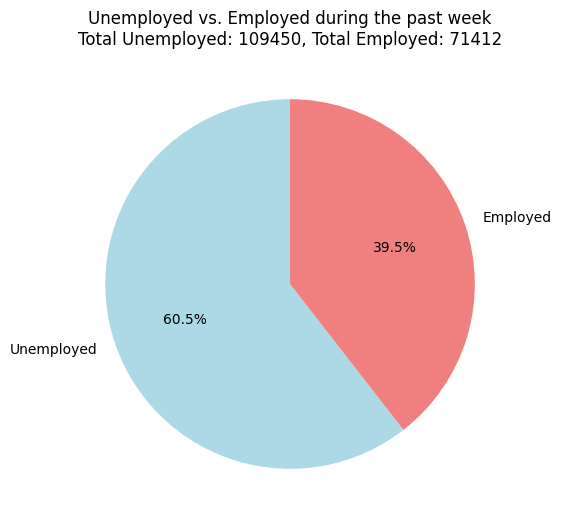

In [8]:
#Pie chart of the Employment status of the household members during the past week
employment_count = cleaned_selected_df["PUFC11_WORK"].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(employment_count, labels=["Unemployed", "Employed"], autopct='%1.1f%%', colors=["lightblue", "lightcoral"], startangle=90)


total_employed = employment_count.get(1, 0)   
total_unemployed = employment_count.get(2, 0)
plt.title(f"Unemployed vs. Employed during the past week\nTotal Unemployed: {total_unemployed}, Total Employed: {total_employed}")


plt.show()

Here we can see that 60.5% of our users are unemployed, while 39.5% of them are employed. With the total count of unemployed people being 109,450 and employed people being 71,412, the pie chart shows that there were more unemployed people than employed ones during the past week with a difference of 38,038. With this in mind, we aim to investigate:
- Which variables influence respondents' inability to do any work in the past week? Alternatively, which variables influence respondents' ability to do or find work in the past week?
- Which variables have little to no correlation with employment for the past week status `PUFC11_WORK` and variables that have significant correleation to it?
- The nature of these relationships

 There are 15 features using scikit-Learn's feature selection methods that was identified to be the most relevant predictors of `PUFC11_WORK`, focusing on their statistical significance in relation to the label. These features divided into the following categories:
- Demographic Information: `PUFC01_LNO`, `PUFC03_REL`, `PUFC05_AGE`, and `PUFC06_MSTAT`
- Employment & Work Characteristics: `PUFC14_PROCC`, `PUFC16_PKB`, `PUFC17_NATEM`, `PUFC19_PHOURS`, `PUFC23_PCLASS`, and `PUFNEWEMPSTAT`
- Job-Seeking & Work Availability: `PUFC20_PWMORE` and `PUFC21_PLADDW`
- Work History & Previous Employment: `PUFC38_PREVJOB`, `PUFC41_WQTR`, and `PUFC43_QKB` 

As `PUFC01_LNO` is a unique identifier for each respondent within a household it will not be analyzed. It is simply a label used to distinguish individuals within a household. For demographic information, the following features will be considered and analyzed `PUFC11_WORK`:
- `PUFC03_REL`: An integer value representing the relationship of the respondent to the household head. It is a categorical value which means that 1 corresponds to Head, 2 is Spouse, 3 is Son/Daughter, 4 is Brother/sister, 5 is Son-in-law/daughter-in-law/6 is grandson/gradndaugter, 7 is father/mother, 8 is other realteive, 9 is boarder, 10 is domestic helper, and 11 is non-relative.
- `PUFC05_AGE`: An integer value corresponding to the respondent's age at the last birthday.
- `PUFC06_MSTAT`: An integer value corresponding to the respondent's marital status. It is a categorical value which means that 1 corresponds to Single, 2 is Marries, 3 is Widowed, 4 is Divorced/Separated, 5 is Annulled, and 6 is Unknown.

C:\Users\Matthew Sanchez\AppData\Local\Temp\ipykernel_25428\2507246894.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_selected_df, x='PUFC11_WORK', y='PUFC05_AGE', palette='coolwarm', ax=axes[1])
C:\Users\Matthew Sanchez\AppData\Local\Temp\ipykernel_25428\2507246894.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(["No (2)", "Yes (1)"])


[Text(0, 0, 'No (2)'), Text(1, 0, 'Yes (1)')]

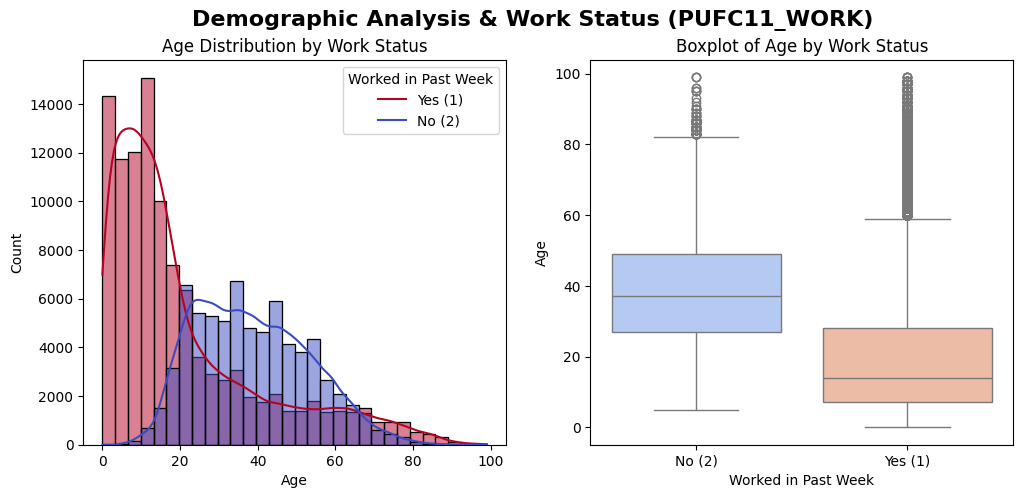

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Demographic Analysis & Work Status (PUFC11_WORK)", fontsize=16, fontweight='bold')

#Age Distribution - Histogram 
sns.histplot(cleaned_selected_df, x='PUFC05_AGE', hue='PUFC11_WORK', kde=True, bins=30, palette='coolwarm', ax=axes[0])
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")
axes[0].set_title("Age Distribution by Work Status")
axes[0].legend(title="Worked in Past Week", labels=["Yes (1)", "No (2)"])

#Age & Work Status during the past week - Boxplot 
sns.boxplot(data=cleaned_selected_df, x='PUFC11_WORK', y='PUFC05_AGE', palette='coolwarm', ax=axes[1])
axes[1].set_xlabel("Worked in Past Week")
axes[1].set_ylabel("Age")
axes[1].set_title("Boxplot of Age by Work Status")
axes[1].set_xticklabels(["No (2)", "Yes (1)"])

With `PUFC05_AGE` being a continuous numerical data type, a histogram with a kernel density estimate (KDE) and boxplot was used. The two visualizations we see above in the first row covers the relationship between `PUFC05_AGE` and `PUFC11_WORK`. The histrogram indicates a high number of people under the age 20 to have worked in the past week while those that did not work in the past week is spread out over a wider age range, with a significant portion at older ages (20-60). As for the boxplot, the median age of those who have worked in the past week also show that they are relatively younger. The working group has a more compact age range, with fewer older individuals, reinforcing the idea that employment is highest among younger-aged individuals. Meanwhile the non-working group has a wider spread, with many older individuals and potential outliers above 80 years. Meaning that older adults are more likely to be retired, unemployed, or not seeking work. The KDE shows a steady presence of middle-aged and elderly individuals in the non-working group, reinforcing this idea.

C:\Users\Matthew Sanchez\AppData\Local\Temp\ipykernel_25428\429463914.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([relationship_labels[i] for i in top_relationships], rotation=45)
C:\Users\Matthew Sanchez\AppData\Local\Temp\ipykernel_25428\429463914.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([marital_status_labels[i] for i in cleaned_selected_df['PUFC06_MSTAT'].unique()], rotation=45)


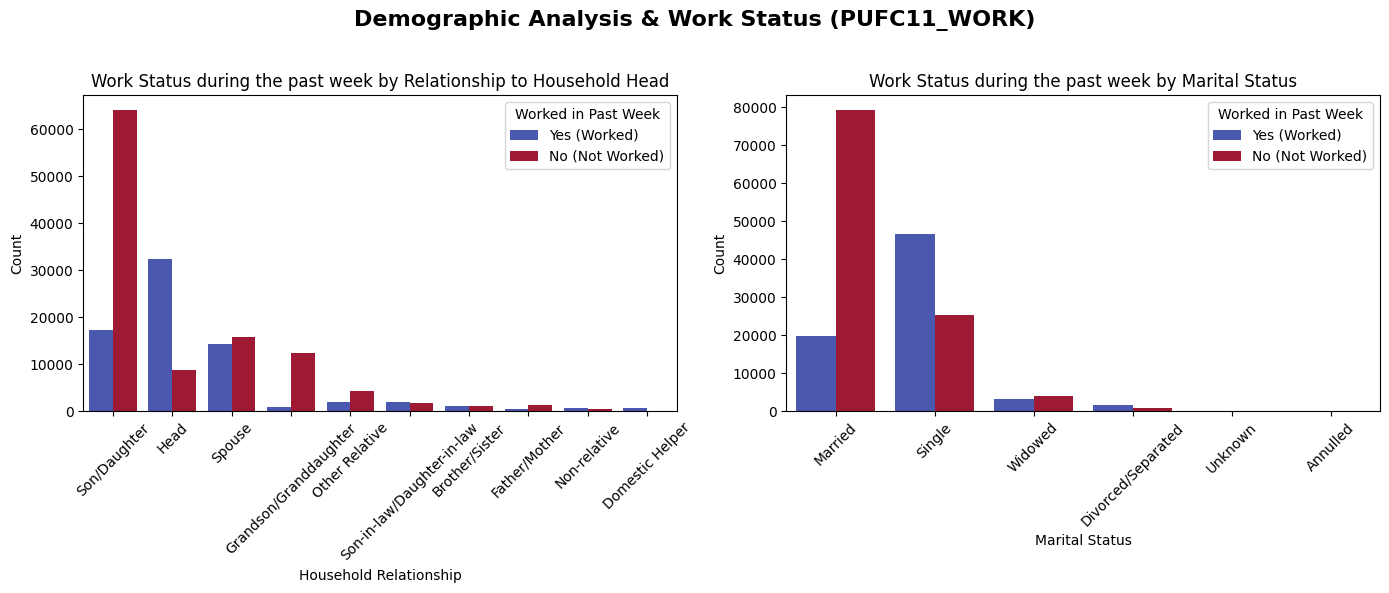

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Demographic Analysis & Work Status (PUFC11_WORK)", fontsize=16, fontweight='bold')

# Define category labels
relationship_labels = {
    1: "Head", 2: "Spouse", 3: "Son/Daughter", 4: "Brother/Sister", 5: "Son-in-law/Daughter-in-law",
    6: "Grandson/Granddaughter", 7: "Father/Mother", 8: "Other Relative", 9: "Boarder",
    10: "Domestic Helper", 11: "Non-relative"
}

marital_status_labels = {
    1: "Single", 2: "Married", 3: "Widowed", 4: "Divorced/Separated", 5: "Annulled", 6: "Unknown"
}

work_status_labels = {1: "Yes (Worked)", 2: "No (Not Worked)"}

# Relationship to Household Head - Count Plot
top_relationships = cleaned_selected_df['PUFC03_REL'].value_counts().nlargest(10).index  # Top 10 categories
filtered_df = cleaned_selected_df[cleaned_selected_df['PUFC03_REL'].isin(top_relationships)]  # Filter dataset

sns.countplot(
    data=filtered_df, x='PUFC03_REL', hue='PUFC11_WORK', palette='coolwarm',
    order=top_relationships, ax=axes[0]
)
axes[0].set_xlabel("Household Relationship")
axes[0].set_ylabel("Count")
axes[0].set_title("Work Status during the past week by Relationship to Household Head")
axes[0].set_xticklabels([relationship_labels[i] for i in top_relationships], rotation=45)
axes[0].legend(title="Worked in Past Week", labels=[work_status_labels[1], work_status_labels[2]])

# Marital Status - Count Plot
sns.countplot(
    data=cleaned_selected_df, x='PUFC06_MSTAT', hue='PUFC11_WORK',
    palette='coolwarm', ax=axes[1]
)
axes[1].set_xlabel("Marital Status")
axes[1].set_ylabel("Count")
axes[1].set_title("Work Status during the past week by Marital Status")
axes[1].set_xticklabels([marital_status_labels[i] for i in cleaned_selected_df['PUFC06_MSTAT'].unique()], rotation=45)
axes[1].legend(title="Worked in Past Week", labels=[work_status_labels[1], work_status_labels[2]])

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

With `PUFC03_REL` arranged by total count (both those who worked and did not work in the past week) from highest to lowest, the Son/Daughter category had the largest number of individuals who did not work, while the Head category had the highest count of individuals who were employed. This highlights a significant proportion of dependents within households, likely consisting of students or young adults not yet in the workforce. In contrast, household heads are predominantly the primary earners.

For `PUFC06_MSTAT`, the countplot reveals that married individuals are more likely to be unemployed, as indicated by the higher number of red bars, whereas single individuals have a greater proportion of those who worked (blue bars). This could suggest that single individuals may have fewer household responsibilities or may be earlier in their careers, increasing their workforce participation.

Next, let us dive in to the employment & work characteristics category: `PUFC14_PROCC`, `PUFC16_PKB`, `PUFC17_NATEM`, `PUFC19_PHOURS`, `PUFC23_PCLASS`, and `PUFNEWEMPSTAT` and how it correlates to `PUFC11_WORK`.
- `PUFC14_PROCC`: A integer value representing the respondent's primary occupation during the past week. It is a categorical value. 
- `PUFC16_PKB` : An integer value representing the kind of business or industry the respondent's employed in. It is a categorical value. 
- `PUFC17_NATEM`: An integer value representing the respondent's nature of employment. It is a categorical value which means that 1 corresponds to permanent, 2 is short-term or seasonal, 3 is different employer on day to day or week to week basis.
- `PUFC19_PHOURS`: An integer value corresponding to the respondent's total number of hours worked during the past week including non-paid hours.
- `PUFC23_PCLASS`: An integer value corresponding to the relationship of the respondent to where he works. It is a categorical value which means that 0 corresponds to worked for private household, 1 is worked for private establishment, 2 is worked for government corporation, 3 is Self-employed without any paid employee, 4 is Employer in own family-operated farm or business, 5 is worked with pay in own familyoperated farm or business, 6 is worked without pay in own familyoperated farm or business
- `PUFNEWEMPSTAT`: An integer value value representing the respondent's employment status based on a new classificaion criteria used in the LFS. It is a categorical value. (No legend provided)

PUFC11_WORK                                         Yes (1)  No (2)
PUFC14_PROCC                                                       
Agricultural, forestry & fishery laborers             10077  108509
Building & related trades workers (excl. electr...     2491      33
Cleaners and helpers                                   3033      15
Drivers & mobile plant operators                       2799      24
Hospitality, retail & other services managers          6756      66
Laborers in mining, construction, manufacturing...     5353      37
Market-oriented skilled agricultural workers           8336     179
Personal service workers                               2763      30
Production & specialized services managers             3916      52
Sales workers                                          5703      41


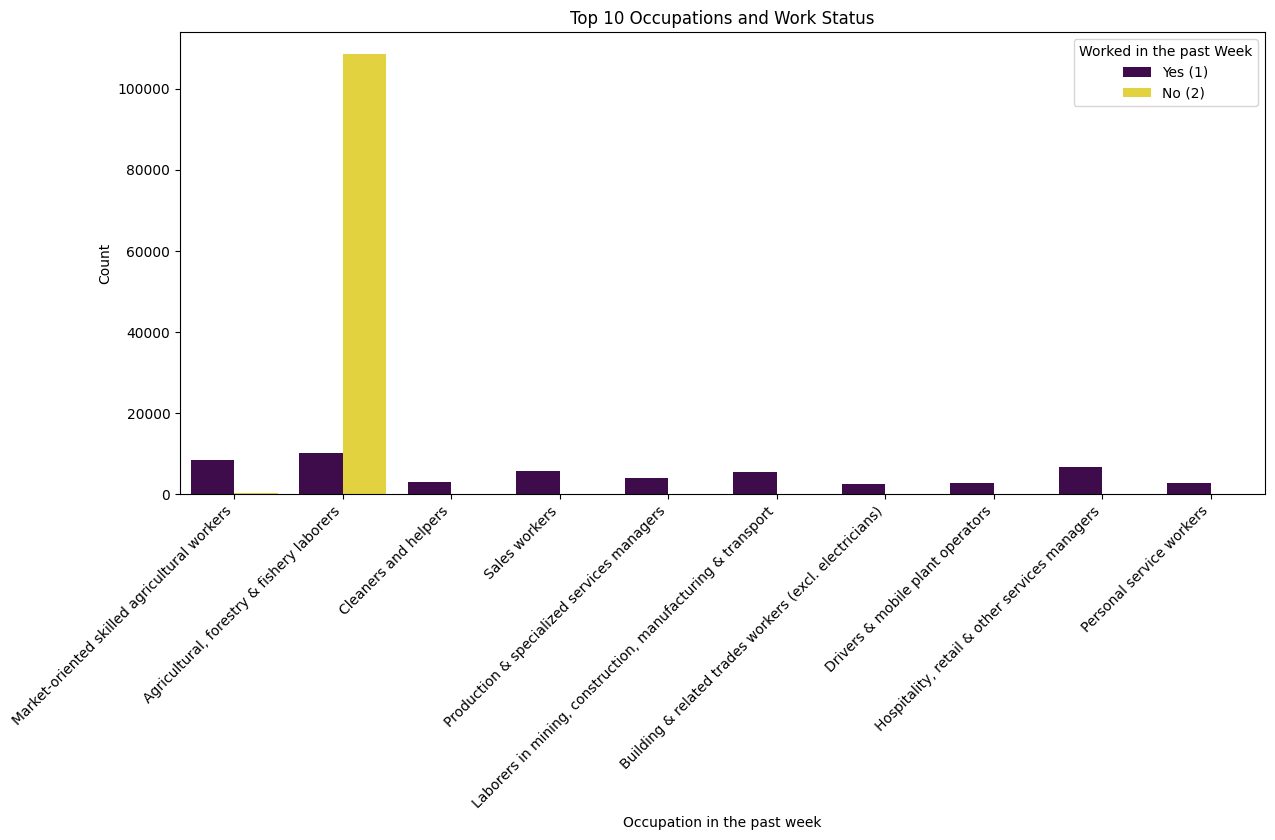

In [11]:
occupation_names = {
    92: "Agricultural, forestry & fishery laborers",
    61: "Market-oriented skilled agricultural workers",
    91: "Cleaners and helpers",
    52: "Sales workers",
    13: "Production & specialized services managers",
    93: "Laborers in mining, construction, manufacturing & transport",
    71: "Building & related trades workers (excl. electricians)",
    83: "Drivers & mobile plant operators",
    14: "Hospitality, retail & other services managers",
    51: "Personal service workers"
}

# Get the top 10 most largest respodnents occupations
top_10_procc = cleaned_selected_df['PUFC14_PROCC'].value_counts().nlargest(10).index
df_top_procc = cleaned_selected_df[cleaned_selected_df['PUFC14_PROCC'].isin(top_10_procc)].copy()

df_top_procc['PUFC14_PROCC'] = df_top_procc['PUFC14_PROCC'].map(occupation_names)
work_status_counts = df_top_procc.groupby('PUFC14_PROCC')['PUFC11_WORK'].value_counts().unstack().fillna(0)
work_status_counts = work_status_counts.rename(columns={1: "Yes (1)", 2: "No (2)"})
print(work_status_counts)


plt.figure(figsize=(14, 6))
sns.countplot(data=df_top_procc, x="PUFC14_PROCC", hue="PUFC11_WORK", palette="viridis")
plt.title("Top 10 Occupations and Work Status")
plt.xlabel("Occupation in the past week")
plt.ylabel("Count")

plt.legend(title="Worked in the past Week", labels=["Yes (1)", "No (2)"])
plt.xticks(rotation=45, ha="right")
plt.show()

`PUFC14_PROCC` was arranged to listing the top 10 respondent's occupation in the past week, as seen in the countplot. Here we can see that out of the 10 occupations, agricultural, forestry and fishery laborers had the highest employed and unemployed respondents during the past week. Those that have worked in the past week seems to be distributed more evenly across the occupations - agricultural, forestry and fishery laborers as the highest with 10077, Market-oriented skilled agricultural workers with 8336, and so on. However a massive difference of those that did not work in the past week were those with the occupation of agricultural, forestry and fishery laborers totaling 108509 which is a hundred thousands more than the other occupations. This may suggest that agriculture-related jobs may be particularly vulnerable to work disruptions (perhaps due to seasonal work, economic conditions, or environmental factors like weather).

Work Status by Industry:
                            Working (Yes)  Not Working (No)
PUFC16_PKB                                                
Agriculture                        17666            108689
Construction of Buildings           4727                51
Land Transport                      4427                36
Public Administration               4232                69
Retail Trade                       12232                85

Work Status by Nature of Employment:
                       Working (Yes)  Not Working (No)
PUFC17_NATEM                                         
Permanent                     54092            109301
Short-term/Seasonal           14804               125
Irregular (Gig Work)           2516                24


C:\Users\Matthew Sanchez\AppData\Local\Temp\ipykernel_25428\1174028145.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)


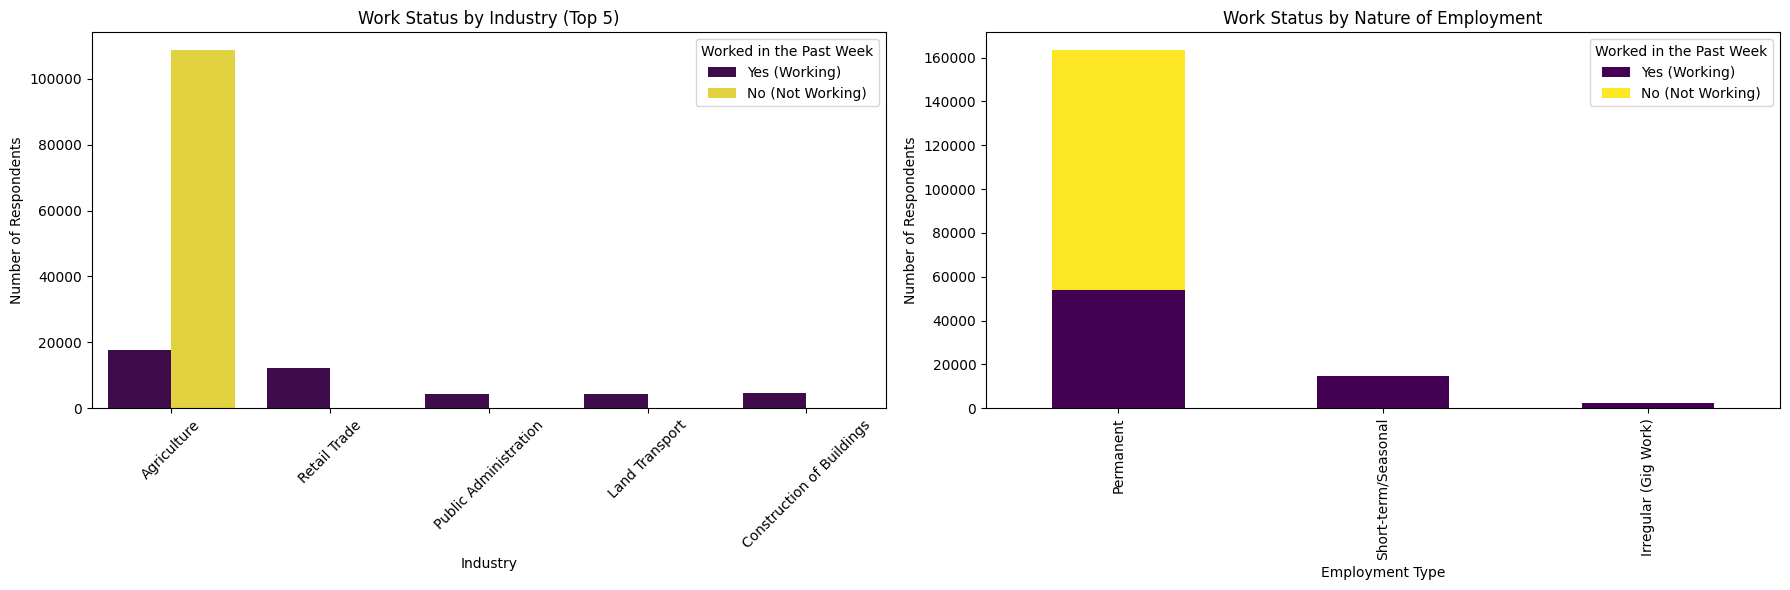


Chi-Square Test (Industry vs Work Status): χ²=76368.79, p=0.00000
Chi-Square Test (Nature of Employment vs Work Status): χ²=28806.95, p=0.00000


In [12]:
industry_labels = {
    1: "Agriculture",
    3: "Agriculture",
    41: "Construction of Buildings",
    47: "Retail Trade",
    49: "Land Transport",
    84: "Public Administration"
}

# Get top 5 industries
top_5_industries = cleaned_selected_df['PUFC16_PKB'].value_counts().nlargest(5).index
df_top_industry = cleaned_selected_df[cleaned_selected_df['PUFC16_PKB'].isin(top_5_industries)].copy()
df_top_industry['PUFC16_PKB'] = df_top_industry['PUFC16_PKB'].map(industry_labels)

# Count work status (1 = Working, 2 = Not Working) by industry
industry_work_counts = df_top_industry.groupby('PUFC16_PKB')['PUFC11_WORK'].value_counts().unstack().fillna(0)
industry_work_counts = industry_work_counts[[1, 2]]  # Ensure order: Working (Yes) first
industry_work_counts.columns = ['Working (Yes)', 'Not Working (No)']

# Count work status by nature of employment (1 = Permanent, 2 = Short-term, 3 = Irregular)
nature_work_counts = cleaned_selected_df.groupby('PUFC17_NATEM')['PUFC11_WORK'].value_counts().unstack().fillna(0)
nature_work_counts = nature_work_counts[[1, 2]]  # Ensure order: Working (Yes) first
nature_work_counts.columns = ['Working (Yes)', 'Not Working (No)']
nature_labels = {1: "Permanent", 2: "Short-term/Seasonal", 3: "Irregular (Gig Work)"}
nature_work_counts.index = nature_work_counts.index.map(nature_labels)

# Display numerical summaries
print("Work Status by Industry:\n", industry_work_counts)
print("\nWork Status by Nature of Employment:\n", nature_work_counts)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Countplot for Top 5 Industries vs Work Status
sns.countplot(data=df_top_industry, x="PUFC16_PKB", hue="PUFC11_WORK", palette="viridis", ax=axes[0])
axes[0].set_title("Work Status by Industry (Top 5)")
axes[0].set_xlabel("Industry")
axes[0].set_ylabel("Number of Respondents")
axes[0].legend(title="Worked in the Past Week", labels=["Yes (Working)", "No (Not Working)"])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Stacked Bar Chart for Nature of Employment vs Work Status
nature_work_counts.plot(kind='bar', stacked=True, colormap="viridis", ax=axes[1])
axes[1].set_title("Work Status by Nature of Employment")
axes[1].set_xlabel("Employment Type")
axes[1].set_ylabel("Number of Respondents")
axes[1].legend(title="Worked in the Past Week", labels=["Yes (Working)", "No (Not Working)"])

plt.tight_layout()
plt.show()

# Chi-Square Test to check significance of relationships
chi2_industry, p_industry, _, _ = chi2_contingency(industry_work_counts)
chi2_nature, p_nature, _, _ = chi2_contingency(nature_work_counts)

print(f"\nChi-Square Test (Industry vs Work Status): χ²={chi2_industry:.2f}, p={p_industry:.5f}")
print(f"Chi-Square Test (Nature of Employment vs Work Status): χ²={chi2_nature:.2f}, p={p_nature:.5f}")

Following that `PUFC16_PKB` and `PUFC17_NATEM` also fall under cateogrical data types a countplot and stacked bar chart were used. In accordance to agricultural-related laboreres being the highest occupation of employed and unemplyoed respodnents during the last week, the countplot of `PUFC16_PKB` shows the Agriculture industry being the highest kind of business that respondents are employed in. As for the stacked bar chart of `PUFC17_NATEM` permanent jobs have the largest number of workers (54,092), but a massive portion (109,301) is not working in the past week. We then used the Chi-Square test for Industry vs. Work Status & Nature of Employment vs. Work Status during the past week to determine whether there is a significant association between two categorical variables. With the X^2 of the two being a large number, we can determine that `PUFC16_PKB` and `PUFC17_NATEM` have a strong association with `PUFC11_WORK`. Additionally with a A p-value of 0.00000 (or < 0.05), it tells us that industry and employment type strongly influence work status, meaning policies and economic conditions affecting certain industries or employment types can have major effects on job availability.

Employment Status Count (Employed Only):
 PUFC11_WORK
1    71412
Name: count, dtype: int64

Summary Statistics of Hours Worked (Employed Only):
count    71412.000000
mean        41.485227
std         18.876313
min          0.000000
25%         30.000000
50%         42.000000
75%         48.000000
max        112.000000
Name: PUFC19_PHOURS, dtype: float64


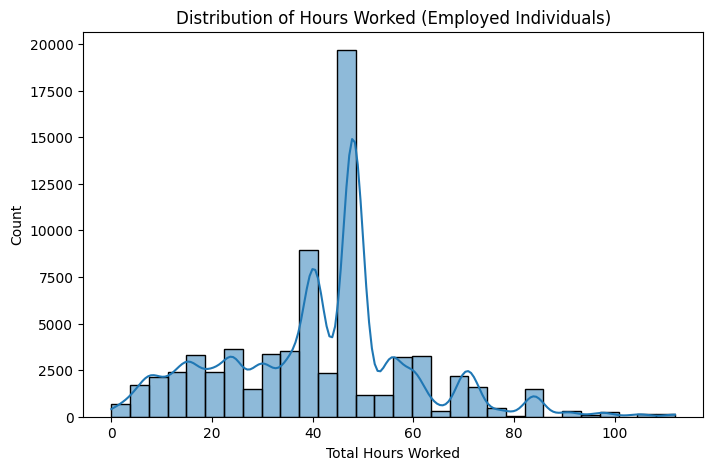

In [13]:
# Filter only employed individuals (PUFC11_WORK == 1)
employed_df = cleaned_selected_df[cleaned_selected_df['PUFC11_WORK'] == 1]

# Count of employed individuals
work_counts = employed_df['PUFC11_WORK'].value_counts()
print("Employment Status Count (Employed Only):\n", work_counts)

# Summary statistics for PUFC19_PHOURS (only employed)
print("\nSummary Statistics of Hours Worked (Employed Only):")
print(employed_df['PUFC19_PHOURS'].describe())

# Histogram of Hours Worked (Only Employed)
plt.figure(figsize=(8, 5))
sns.histplot(employed_df['PUFC19_PHOURS'], bins=30, kde=True)
plt.title("Distribution of Hours Worked (Employed Individuals)")
plt.xlabel("Total Hours Worked")
plt.ylabel("Count")
plt.show()

With `PUFC19_PHOURS` accounting for the total hours worked in the past week, those that did not work in the past week `PUFC11_WORK`'s (No=2) will not be accounted for. The average weekly hours worked is 41.49, with a median of 42, closely aligning with a full-time schedule.However, the distribution also shows a notable spread, with a standard deviation of 18.88 hours, suggesting considerable variation in working hours across different individuals. The histogram peaks at around 40 hours, with secondary peaks at 20 and 60+ hours, likely reflecting part-time and overtime workers. Some report 0 hours despite being employed, possibly due to temporary leave. The maximum of 112 hours suggests extreme workloads in high-demand professions.

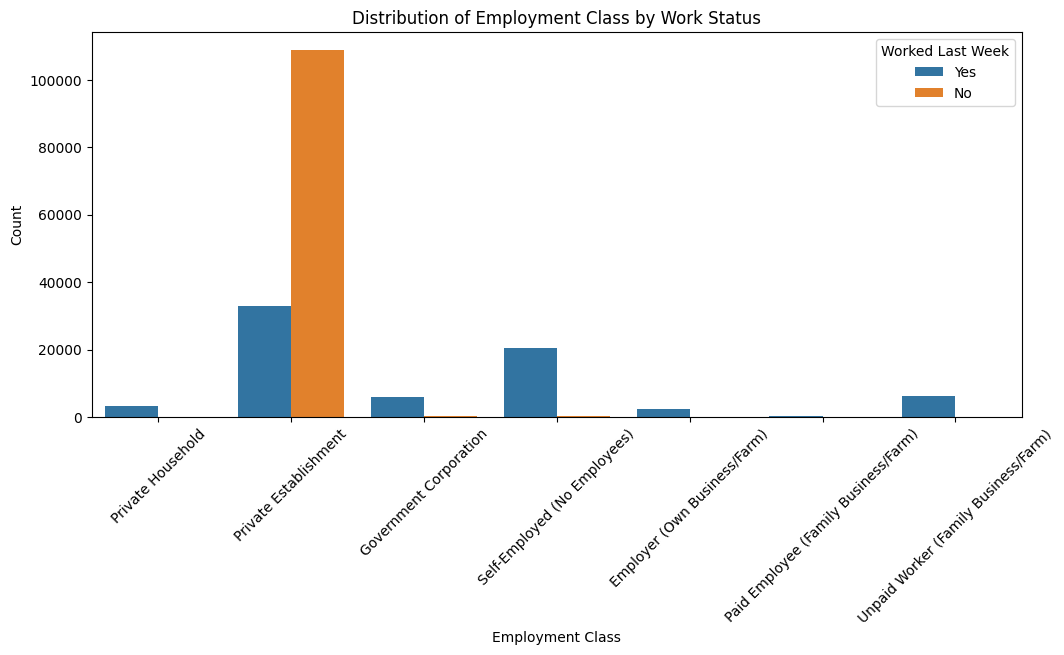

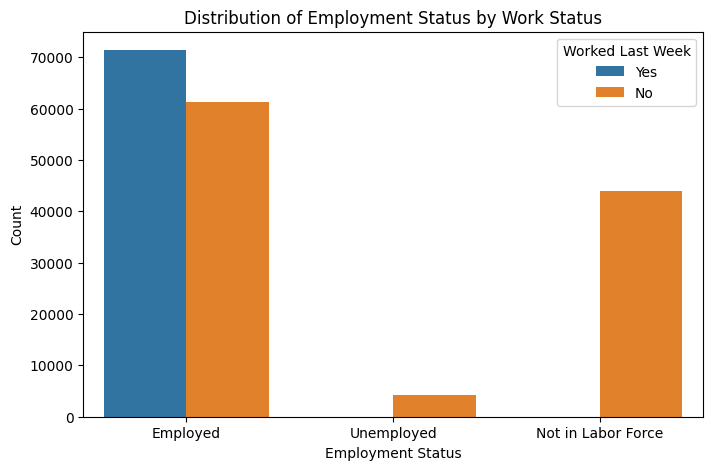

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define category labels for EDA (Do not modify the original DataFrame)
pclass_labels = {
    0: 'Private Household',
    1: 'Private Establishment',
    2: 'Government Corporation',
    3: 'Self-Employed (No Employees)',
    4: 'Employer (Own Business/Farm)',
    5: 'Paid Employee (Family Business/Farm)',
    6: 'Unpaid Worker (Family Business/Farm)'
}

empstat_labels = {
    1: 'Employed',
    2: 'Unemployed',
    3: 'Not in Labor Force'
}

work_labels = {1: 'Yes', 2: 'No'}

# Create a **separate** copy for visualization only
eda_df = cleaned_selected_df.copy()

# Apply categorical labels only on eda_df (Original DataFrame remains numeric)
eda_df['PUFC23_PCLASS'] = eda_df['PUFC23_PCLASS'].map(pclass_labels)
eda_df['PUFNEWEMPSTAT'] = eda_df['PUFNEWEMPSTAT'].map(empstat_labels)
eda_df['PUFC11_WORK'] = eda_df['PUFC11_WORK'].map(work_labels)

# Count plots using eda_df (which has labels)
plt.figure(figsize=(12, 5))
sns.countplot(data=eda_df, x='PUFC23_PCLASS', hue='PUFC11_WORK', order=pclass_labels.values())
plt.xticks(rotation=45)
plt.title('Distribution of Employment Class by Work Status')
plt.xlabel('Employment Class')
plt.ylabel('Count')
plt.legend(title='Worked Last Week')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=eda_df, x='PUFNEWEMPSTAT', hue='PUFC11_WORK', order=empstat_labels.values())
plt.title('Distribution of Employment Status by Work Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.legend(title='Worked Last Week')
plt.show()


For `PUFC23_PCLASS` a significant portion of the respondents are classified under working for a Private Establishment. A large number of them did not work for the past week, but majority of those that did work for the past week is still woked under a private establishment with the government corporation coming to a second. In the countplot of `PUFNEWEMPSTAT`, we can see that most of the respondents are actually employed but a good number of them did not work during the past week. A significant portion of them however were also not in the labor force which could mean that they are still students or are retired. 

                       count       mean        std   min   25%   50%   75%  \
PUFNEWEMPSTAT                                                                
Employed            132692.0  25.106043  19.247276   0.0   8.0  22.0  40.0   
Not in Labor Force   43877.0  36.190168  20.768715  15.0  18.0  28.0  52.0   
Unemployed            4293.0  29.096902  11.651927  15.0  21.0  25.0  34.0   

                     max  
PUFNEWEMPSTAT             
Employed            99.0  
Not in Labor Force  99.0  
Unemployed          78.0  


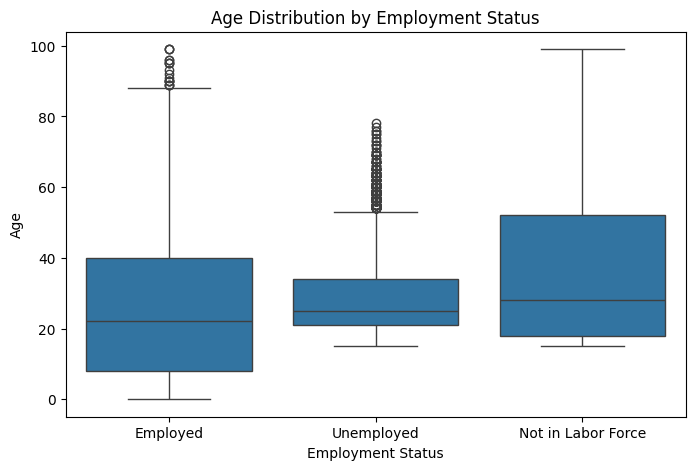

In [15]:
print(eda_df.groupby('PUFNEWEMPSTAT')['PUFC05_AGE'].describe())

plt.figure(figsize=(8, 5))
sns.boxplot(data=eda_df, x='PUFNEWEMPSTAT', y='PUFC05_AGE', order=['Employed', 'Unemployed', 'Not in Labor Force'])
plt.title('Age Distribution by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Age')
plt.show()

Moving on to the next category we have job-seeking & work availability: `PUFC20_PWMORE` and `PUFC21_PLADDW`. 
- `PUFC20_PWMORE` is an integer value that indicates if the respondent wants more hours of work during the past week. 
- `PUFC21_PLADDW` is an integer value representing whether the respondent looked for additional work during the past week.

Given that `PUFC20_PWMORE` and `PUFC21_PLADDW` are both categorical variables (1 = Yes, 2 = No) alongside `PUFC11_WORK`, a count plot was used to visualize how these factors relate to employment status for the past week `PUFC11_WORK`.

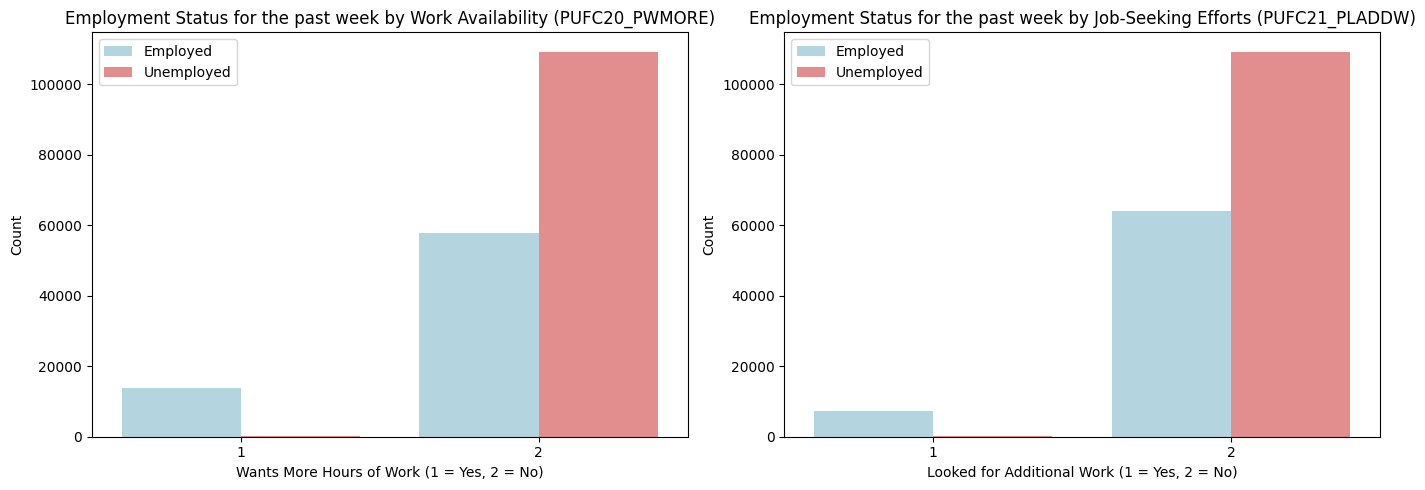

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#Work Availability by Employment Status for the past week
sns.countplot(data=eda_df, x="PUFC20_PWMORE", hue="PUFC11_WORK", palette=["lightblue", "lightcoral"], ax=axes[0])
axes[0].set_title("Employment Status for the past week by Work Availability (PUFC20_PWMORE)")
axes[0].set_xlabel("Wants More Hours of Work (1 = Yes, 2 = No)")
axes[0].set_ylabel("Count")
axes[0].legend(["Employed", "Unemployed"])

#Job-Seeking by Employment Status for the past week
sns.countplot(data=eda_df, x="PUFC21_PLADDW", hue="PUFC11_WORK", palette=["lightblue", "lightcoral"], ax=axes[1])
axes[1].set_title("Employment Status for the past week by Job-Seeking Efforts (PUFC21_PLADDW)")
axes[1].set_xlabel("Looked for Additional Work (1 = Yes, 2 = No)")
axes[1].set_ylabel("Count")
axes[1].legend(["Employed", "Unemployed"])

plt.tight_layout()
plt.show()

 We can see that in the count plot to the right, employed respondents during the past week have a a significantly higher desire to get more work than unemplyoed respondents during the past week. Additionally, a significant amount of unemployed respondents during the past week do not want more work as opposed to employed respondents. The same case is seen in the count plot to the left as more employed respondents during the past week has taken the initiative to look for more work while more unemployred respondents do not try. 

To further gain more insights, a contingency table (crosstab) heatmap will be made to help visualize relationships between the two categorical variables, making it easier to compare across groups.

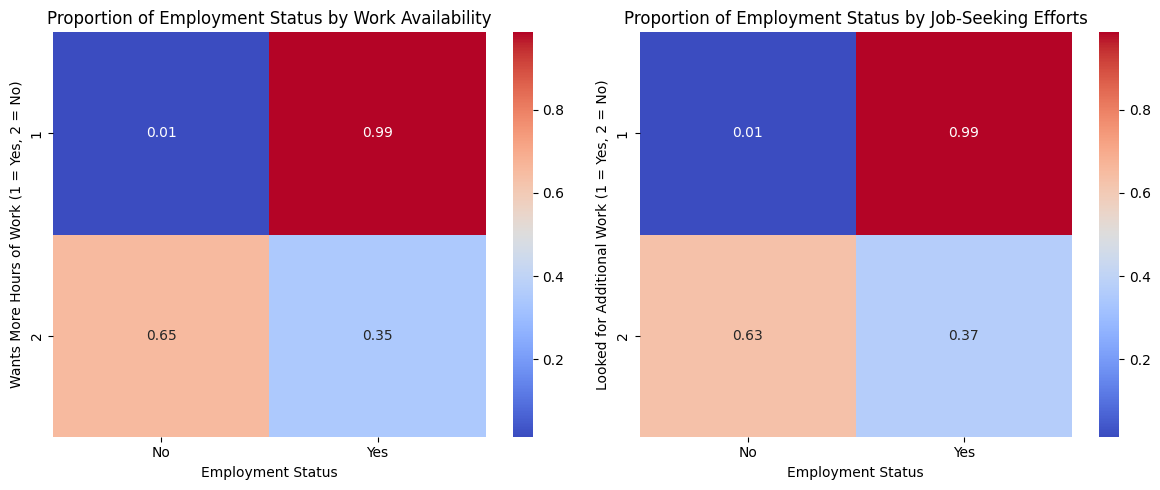

In [17]:
crosstab_pwmore = pd.crosstab(eda_df["PUFC20_PWMORE"], eda_df["PUFC11_WORK"], normalize="index")
crosstab_pladdw = pd.crosstab(eda_df["PUFC21_PLADDW"], eda_df["PUFC11_WORK"], normalize="index")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(crosstab_pwmore, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Proportion of Employment Status by Work Availability")
axes[0].set_xlabel("Employment Status")
axes[0].set_ylabel("Wants More Hours of Work (1 = Yes, 2 = No)")

sns.heatmap(crosstab_pladdw, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Proportion of Employment Status by Job-Seeking Efforts")
axes[1].set_xlabel("Employment Status")
axes[1].set_ylabel("Looked for Additional Work (1 = Yes, 2 = No)")

plt.tight_layout()
plt.show()

The contingency table (crosstab) heatmap further gives us insight into the relationship between employment status during the past week `PUFC11_WORK` and the two variables`PUFC20_PWMORE` and `PUFC21_PLADDW`. 

Take note: Dark red indicates a Higher proportion (strong relationship) while dark blue indicates a Lower proportion (weak relationship). 

On the left heatmap, these are the following takeaways:
- 99% of people who want more work are employed (top-right red cell)
- Only 1% of those who want more work are unemployed (top-left blue cell).
- Among those who don’t want more work, 65% are unemployed, while 35% are employed (bottom row).
Insight: Most respondents who are actively seeking more work are already employed rather than unemployed.


On the right heatmap, these are the following takeaways:
- 99% of people who looked for additional work are employed (top-right red cell).
- Only 1% of job-seekers are unemployed (top-left blue cell).
- Among those who did not look for extra work, 63% are unemployed, while 37% are employed (bottom row).
Insight: The majority of job-seeking behavior is coming from those already employed, rather than the unemployed.

Therefore we can conclude that:
- Employment does not prevent job-seeking behavior as a number of employed individuals still seek more work.
- Unemployed individuals are less likely to look for additional work compared to the employed.
- Most job seekers and those wanting extra work are already in the workforce rather than unemployed.

Finally, we have the last category which is the work history & previous employment: `PUFC38_PREVJOB`, `PUFC41_WQTR`, and `PUFC43_QKB`. With `PUFC38_PREVJOB` and `PUFC41_WQTR` also being categorical variables the contingency table (crosstab) heatmap will be used.
- `PUFC38_PREVJOB`: An integer value indicating whether the respondent has worked before. (1=Yes and 2=No)
- `PUFC41_WQTR`: An integer value indicating whether the respondent has worked at all or business during the past quarter. (1=Yes and 2=No)
- `PUFC43_QKB`: An integer value value representing the respondent's kind of business for the past quarter. It is a categorical value. (No legend provided)

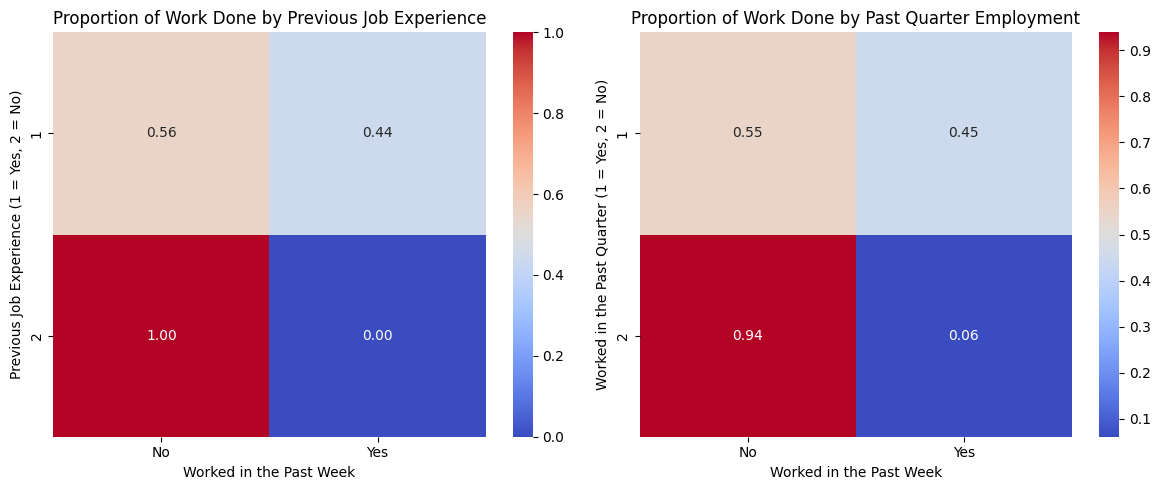

In [18]:
# Compute crosstab analyses
crosstab_prevjob = pd.crosstab(eda_df["PUFC38_PREVJOB"], eda_df["PUFC11_WORK"], normalize="index")
crosstab_wqtr = pd.crosstab(eda_df["PUFC41_WQTR"], eda_df["PUFC11_WORK"], normalize="index")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Heatmap for Previous Job Experience vs. Work Done
sns.heatmap(crosstab_prevjob, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Proportion of Work Done by Previous Job Experience")
axes[0].set_xlabel("Worked in the Past Week")
axes[0].set_ylabel("Previous Job Experience (1 = Yes, 2 = No)")

# Heatmap for Past Quarter Employment vs. Work Done
sns.heatmap(crosstab_wqtr, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Proportion of Work Done by Past Quarter Employment")
axes[1].set_xlabel("Worked in the Past Week")
axes[1].set_ylabel("Worked in the Past Quarter (1 = Yes, 2 = No)")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

The heatmaps show the relationship between previous job experience (PUFC38_PREVJOB), past quarter employment (PUFC41_WQTR), and whether an individual worked in the past week (PUFC11_WORK).

On the left heatmap, these are the following takeaways:
- 56% of individuals with previous job experience (PUFC38_PREVJOB = 1) worked in the past week (PUFC11_WORK = No).
- 44% of those with previous job experience did not work in the past week (PUFC11_WORK = Yes).
- 100% of individuals with no previous job experience (PUFC38_PREVJOB = 2) did not work in the past week.
Insight: Having prior job experience significantly increases the likelihood of working in the past week (or currently).

On the right heatmap, these are the following takeaways:
- 55% of those who were employed in the past quarter (PUFC41_WQTR = 1) worked in the past week.
- 45% of them did not work in the past week.
- 94% of individuals who were NOT employed in the past quarter (PUFC41_WQTR = 2) did NOT work in the past week.
Insight: Being employed in the past quarter increases the chances of working in the past week, but there is still a portion (45%) who did not work.

With this we can conclude that:
- Prior job experience plays a crucial role in current employment—those without previous job experience have a very low probability of working in the past week.
- Recent employment history (past quarter) strongly influences work status, but there is still some room for fluctuations (not all employed in the past quarter are currently working).
- The strongest factor appears to be previous job experience, as having a prior job experience strongly influences the likelihood fo the respondent to work during the past week (or even as of currently).

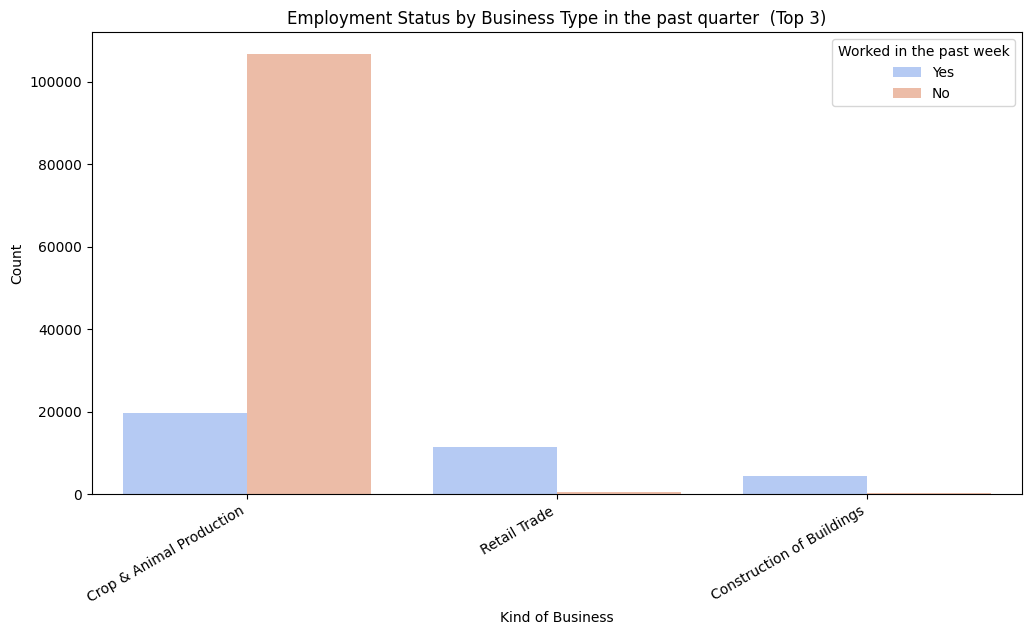

In [19]:
business_labels = {
    1: "Crop & Animal Production",
    47: "Retail Trade",
    41: "Construction of Buildings"
}

# Get the top 3 most common business types
top_3_business = eda_df['PUFC43_QKB'].value_counts().nlargest(3).index

filtered_df = eda_df[eda_df['PUFC43_QKB'].isin(top_3_business)].copy()
filtered_df['PUFC43_QKB'] = filtered_df['PUFC43_QKB'].map(business_labels)
filtered_df['PUFC11_WORK'] = filtered_df['PUFC11_WORK'].replace({-1: 'Yes', -2: 'No'})
top_3_business_labels = [business_labels[val] for val in top_3_business]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='PUFC43_QKB', hue='PUFC11_WORK', palette='coolwarm', order=top_3_business_labels)
plt.xlabel('Kind of Business')
plt.ylabel('Count')
plt.title('Employment Status by Business Type in the past quarter  (Top 3)')
plt.legend(title='Worked in the past week')
plt.xticks(rotation=30, ha='right')  
plt.show()

The top 3 most common business types that the population has worked in are Crop & Animal Production, Retail Trade, and Construction of buildings.

On the bar graph above, here are the following takeaways:
- Majority of the people surveyed are part of the Crop & Animal Production Business.
- Majority of the people in the Crop & Animal Production Business have not worked in the past week.
- Majority of the people in the Retail Trade and Construction of Buildings have worked in the past week.

With this, we can conclude that:

The kind of Business a person is working in affects whether or not they have been employed or worked the past week. This may be due to the nature of their contract where Crop & Animal Production are usually not under a contract that requires them to work every day or week as compared to a retail or construction worker who might have to work a 9-5 job every week.

## Section 6. Initial Model Training

### Binomial Logistic Regression Model

Binomial Logistic Regression (BLR) was chosen for our binary classification task since it predicts probabilities of different scales of data and generalizes well. Compared to the other two models, BLR is simple yet effective, especially when applying regularization to prevent overfitting. Since we are dealing with a fairly large dataset, a simple classification model like binomial logistic regression can be sluggish, which is where Stochastic Gradient Descent (SGD) comes in. SGD is the optimization we decided to apply side by side BLR since it updates the model in small steps, making it faster and more scalable for bigger data.

**Hyperparameters:**

Optimizer: Stochastic Gradient Descent

Learning Rate: 0.0005

Learning Rate Schedule: Constant

Maximum Iterations: 1000

Tolerance: 0.00001

### Training and testing the data in the binomial logistic regression model

In [20]:
# Prepare Dataset
X_sgd = cleaned_selected_df.drop('PUFC11_WORK', axis=1).values  
y_sgd = cleaned_selected_df['PUFC11_WORK'].values

# Normalize Data
scaler_sgd = StandardScaler()
X_scaled_sgd = scaler_sgd.fit_transform(X_sgd)  # Fit on full dataset

# Initialize SGDClassifier
sgd_log_reg = SGDClassifier(loss="log_loss", learning_rate="constant", eta0=0.0005, tol=0.00001, max_iter=1000, random_state=41)

# 5-Fold Cross-Validation
kf_sgd = KFold(n_splits=5, shuffle=True, random_state=41)

# Compute Both Training and Validation Accuracy for Each Fold
cv_results = cross_validate(sgd_log_reg, X_scaled_sgd, y_sgd, cv=kf_sgd, return_train_score=True, scoring='accuracy')

train_scores = cv_results['train_score']
val_scores = cv_results['test_score']

# Compute Accuracy for Each Fold
cv_scores_sgd = cross_val_score(sgd_log_reg, X_scaled_sgd, y_sgd, cv=kf_sgd, scoring='accuracy')

# Generate Predictions using Cross-Validation
y_pred_sgd = cross_val_predict(sgd_log_reg, X_scaled_sgd, y_sgd, cv=kf_sgd)

# Check Overfitting: Train vs Validation Accuracy
print(f"Training Accuracy per fold: {train_scores}")
print(f"Testing Accuracy per fold: {val_scores}")
print(f"Mean Training Accuracy: {np.mean(train_scores) * 100:.4f}%")
print(f"Mean Testing Accuracy: {np.mean(val_scores) * 100:.4f}%")

Training Accuracy per fold: [0.97395794 0.97346032 0.97414472 0.97424148 0.97355726]
Testing Accuracy per fold: [0.97265917 0.97511956 0.97489771 0.97196727 0.97481477]
Mean Training Accuracy: 97.3872%
Mean Testing Accuracy: 97.3892%


### Decision Tree

Decision Trees was chosen as well due to being effective for binary classification due to their interpretability, ability to handle non-linearity and feature interactions, and minimal data preprocessing requirements. They do not need feature scaling, work well with missing data, and efficiently process large datasets such as the one we're working with. Additionally, they can handle class imbalances, which is quite apparent in this dataset, through weighted splitting and perform well with high-dimensional data by automatically selecting important features. Although that last part was already done beforehand.

**Hyperparameters:**

Max Depth: 1

Minimum Sample to Split: 2000

Minimum Sample per Leaf: 500

Maximum Features: sqrt

Pruning (ccp_alpha): 0.02

### Training and testing the data in the decision tree model

In [21]:
# Prepare Dataset
X_tree = cleaned_selected_df.drop('PUFC11_WORK', axis=1).values  
y_tree = cleaned_selected_df['PUFC11_WORK'].values  

# Normalize Data (optional for trees, but keeping consistency)
scaler_tree = StandardScaler()
X_scaled_tree = scaler_tree.fit_transform(X_tree)  # Fit on full dataset

# Initialize Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=41, max_depth=1, min_samples_split=2000, min_samples_leaf=500, max_features="sqrt", ccp_alpha=0.02)

# 5-Fold Cross-Validation
kf_tree = KFold(n_splits=5, shuffle=True, random_state=41)

# Compute Both Training and Validation Accuracy for Each Fold
cv_results_tree = cross_validate(tree_clf, X_scaled_tree, y_tree, cv=kf_tree, return_train_score=True, scoring='accuracy')

train_scores_tree = cv_results_tree['train_score']
val_scores_tree = cv_results_tree['test_score']

# Generate Predictions using Cross-Validation
y_pred_tree = cross_val_predict(tree_clf, X_scaled_tree, y_tree, cv=kf_tree)

# Print Accuracy Results
print("\n5-Fold Cross-Validation Results (Decision Tree Classifier)")
print(f"Training Accuracy per fold: {train_scores_tree}")
print(f"Testing Accuracy per fold: {val_scores_tree}")
print(f"Mean Training Accuracy: {np.mean(train_scores_tree) * 100:.4f}%")
print(f"Mean Testing Accuracy: {np.mean(val_scores_tree) * 100:.4f}%")


5-Fold Cross-Validation Results (Decision Tree Classifier)
Training Accuracy per fold: [0.90272239 0.90277077 0.90290967 0.90308936 0.90305481]
Testing Accuracy per fold: [0.90365742 0.90346391 0.90290833 0.90218954 0.90232777]
Mean Training Accuracy: 90.2909%
Mean Testing Accuracy: 90.2909%


### Neural Network Model

As for our third model, we will use a neural network since it's a flexible model that can handle both regression and classification tasks. Since we are performing binary classification (Yes/No output), our neural network has one output neuron with a sigmoid activation function. The network consists of 15 input neurons (equal to the number of features) and three hidden layers with 64, 32, and 16 neurons, respectively. Each hidden layer uses the ReLU activation function, which helps introduce non-linearity and prevents the vanishing gradient problem. To improve model stability, Batch Normalization is applied after each hidden layer to prevent extreme activations. The network is optimized using Adam with a learning rate of 0.0005, which means it is set in a contant learning rate schedule. As previously mentioned, since our dataset is imbalanced, we also used class weighting in BCEWithLogitsLoss to ensure that both classes (1 and 2) are learned equally. This helps prevent the model from always predicting the majority class.

**Hyperparameters:**

Input Layer Neurons: 15

Hidden Layers: 3

Hidden Layer 1 Neurons: 64

Hidden Layer 2 Neurons: 32

Hidden Layer 3 Neurons: 16

Output Layer Neurons: 1

Hidden Layer Activation Function: Rectified Linear Unit (ReLU)

Output Layer Activation Function: Sigmoid Function

Loss Function: Binary Cross-Entropy with Logits (BCEWithLogitsLoss)

Epochs: 100

Optimizer: Adaptive Moment Estimation (ADAM)

Learning Rate: 0.0005

Learning Rate Schedule: Constant

### Training the data in the neural network model

In [22]:
# Define Neural Network Class
class NeuralNetwork(nn.Module):
    def __init__(self, inputL=15, h1=64, h2=32, h3=16, outputL=1):
        super().__init__()
        self.fc1 = nn.Linear(inputL, h1)
        self.bn1 = nn.BatchNorm1d(h1)  
        self.fc2 = nn.Linear(h1, h2)
        self.bn2 = nn.BatchNorm1d(h2)  
        self.fc3 = nn.Linear(h2, h3)
        self.bn3 = nn.BatchNorm1d(h3)  
        self.out = nn.Linear(h3, outputL)

    def forward(self, x):
        x = self.bn1(F.relu(self.fc1(x)))  
        x = self.bn2(F.relu(self.fc2(x)))  
        x = self.bn3(F.relu(self.fc3(x)))  
        x = self.out(x)  
        return x

torch.manual_seed(41)

# Load and Normalize Data
X_nn = cleaned_selected_df.drop('PUFC11_WORK', axis=1).values  
y_nn = cleaned_selected_df['PUFC11_WORK'].values  

scaler_nn = StandardScaler()
X_nn = scaler_nn.fit_transform(X_nn)

X_nn = torch.FloatTensor(X_nn)
y_nn = torch.FloatTensor(y_nn).unsqueeze(1) - 1  # Convert labels: 1 → 0, 2 → 1

# Compute Class Weights
y_np_nn = y_nn.numpy().flatten()
classes_nn = np.unique(y_np_nn)
class_weights_nn = compute_class_weight(class_weight="balanced", classes=classes_nn, y=y_np_nn)
adjusted_weight_nn = class_weights_nn[1] * 0.65  
class_weights_nn = torch.tensor([adjusted_weight_nn], dtype=torch.float32)

# Define Cross-Validation
kf_nn = KFold(n_splits=5, shuffle=True, random_state=41)

# Store Results
train_accuracies_nn = []
val_accuracies_nn = []
all_y_true_nn = []
all_y_pred_nn = []

# Cross-Validation Loop
for fold, (train_idx_nn, val_idx_nn) in enumerate(kf_nn.split(X_nn)):
    # Split Data
    X_train_nn, X_val_nn = X_nn[train_idx_nn], X_nn[val_idx_nn]
    y_train_nn, y_val_nn = y_nn[train_idx_nn], y_nn[val_idx_nn]

    # Initialize Model
    model_nn = NeuralNetwork()
    criterion_nn = nn.BCEWithLogitsLoss(pos_weight=class_weights_nn)
    optimizer_nn = torch.optim.Adam(model_nn.parameters(), lr=0.00005)

    # Train Model
    epochs_nn = 100
    for epoch in range(epochs_nn):
        optimizer_nn.zero_grad()
        y_pred_nn = model_nn(X_train_nn)
        loss_nn = criterion_nn(y_pred_nn, y_train_nn)
        loss_nn.backward()
        optimizer_nn.step()

    # Compute Training Accuracy
    with torch.no_grad():
        y_train_pred_nn = model_nn(X_train_nn)
        y_train_pred_class_nn = (torch.sigmoid(y_train_pred_nn) > 0.5).float()
        train_acc_nn = (y_train_pred_class_nn == y_train_nn).float().mean().item()

        # Compute Validation Accuracy
        y_val_pred_nn = model_nn(X_val_nn)
        y_val_pred_class_nn = (torch.sigmoid(y_val_pred_nn) > 0.5).float()
        val_acc_nn = (y_val_pred_class_nn == y_val_nn).float().mean().item()

    print(f"Fold {fold + 1}: Training Accuracy = {train_acc_nn:.4f}, Testing Accuracy = {val_acc_nn:.4f}")

    train_accuracies_nn.append(train_acc_nn)
    val_accuracies_nn.append(val_acc_nn)

    # Store all validation predictions for confusion matrix
    all_y_true_nn.extend(y_val_nn.numpy().flatten())  
    all_y_pred_nn.extend(y_val_pred_class_nn.numpy().flatten())  

# Compute Mean Test Accuracy
mean_test_accuracy_nn = np.mean(val_accuracies_nn) * 100

# Print Final Mean Accuracy
print("\nFinal Cross-Validation Accuracy")
print(f"Mean Training Accuracy: {np.mean(train_accuracies_nn) * 100:.4f}%")
print(f"Mean Testing Accuracy: {mean_test_accuracy_nn:.4f}%")


Fold 1: Training Accuracy = 0.8683, Testing Accuracy = 0.8689
Fold 2: Training Accuracy = 0.8234, Testing Accuracy = 0.8250
Fold 3: Training Accuracy = 0.8068, Testing Accuracy = 0.8068
Fold 4: Training Accuracy = 0.9241, Testing Accuracy = 0.9239
Fold 5: Training Accuracy = 0.8364, Testing Accuracy = 0.8333

Final Cross-Validation Accuracy
Mean Training Accuracy: 85.1794%
Mean Testing Accuracy: 85.1600%


After applying a 5-fold cross validation to determine the mean training and testing accuracies, the model neither exhibits underfitting nor overfitting for the initial model training. More analysis with regard to this performance will be discussed on the next section.

## Section 7. Error Analysis

For each of the three models, we used the classification report and receiver operating characteristic area under the curve (ROC AUC) score features from sklearn to gather more insights regarding the model's performance. The classification report will help analyze the precision, recall, f1-score, and support. While the ROC AUC score will help evaluate the binary classification model's performance when it comes to its ability to distinguish between the two classes. Recall that:

Class 1 - Worked

Class 2 - Didn't work

### Binomial Logistic Regression

In [23]:
# Classification Report
print("\n**Classification Report (SGDClassifier - 5-Fold CV)**")
print(classification_report(y_sgd, y_pred_sgd))  # Classification report for cross-validation

# ROC-AUC Score
roc_auc_sgd = roc_auc_score(y_sgd, y_pred_sgd)
print(f"ROC-AUC Score: {roc_auc_sgd:.4f}")

# Class Distribution in Predictions
unique, counts = np.unique(y_pred_sgd, return_counts=True)
class_distribution_sgd = {int(label): int(count) for label, count in zip(unique, counts)}
print("\n**Class Distribution in Predictions (SGDClassifier - 5-Fold CV)**")
for label, count in class_distribution_sgd.items():
    print(f"Class {label}: {count}")



**Classification Report (SGDClassifier - 5-Fold CV)**
              precision    recall  f1-score   support

           1       0.97      0.96      0.97     71412
           2       0.97      0.98      0.98    109450

    accuracy                           0.97    180862
   macro avg       0.97      0.97      0.97    180862
weighted avg       0.97      0.97      0.97    180862

ROC-AUC Score: 0.9717

**Class Distribution in Predictions (SGDClassifier - 5-Fold CV)**
Class 1: 70604
Class 2: 110258


The **precision** shows that 97% of the instances predicted to belong to class 1 indeed belonged to class 1. While 97% of the instances predicted to belong to class 2 indeed belonged to class 2.

The **recall** shows that of all the actual instances of class 1, 96% were correctly classified. While of all the actual instances of class 2, 98% were correctly classified. In comparison to the other metrics, recall has the most initial difference when comparing the two classes. In, this model **it is class 1 that is slightly difficult to predict** due to the lower recall score.

The **F1-score** shows that there is a 97% balance between the precision and recall in class 1. While there is a 98% balance between the precision and recall in class 2.

The **ROC AUC score** of 97% means the model does an excellent job in distinguishing what class an instance belongs to.

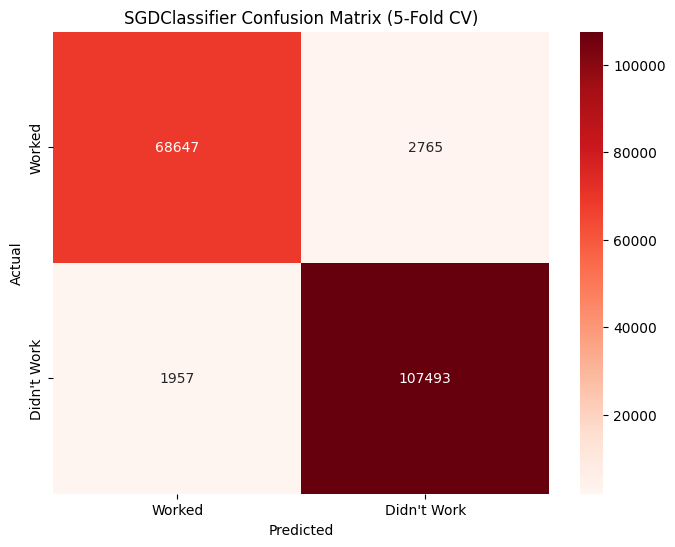

In [24]:
# Compute Confusion Matrix for Full Dataset (Using Cross-Val Predictions)
cm_sgd = confusion_matrix(y_sgd, y_pred_sgd)  # Matches 5-Fold CV setup
class_labels = ["Worked", "Didn't Work"]

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_sgd, annot=True, fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SGDClassifier Confusion Matrix (5-Fold CV)")
plt.show()


Looking at the false positives **(1,957)** and false negatives **(2,765)**, it appears at first glance that the model might be struggling to classify class 1 instances due to the higher false negatives and reflection of its lower recall value compared to class 2. However, when analyzing these errors relative to the total predictions, both Type I (false positives) and Type II (false negatives) errors are minimal, suggesting that the model maintains a strong balance in classification performance. The overall misclassification rate is quite low, reinforcing the model’s reliability in distinguishing between the two classes.

Moreover, this is further supported by the high ROC AUC score of 0.9717, indicating that the model has an excellent ability to separate class 1 and class 2 instances effectively. 

### Decision Tree

In [25]:
# Classification Report
print("\nClassification Report (Decision Tree - 5-Fold CV)")
print(classification_report(y_tree, y_pred_tree)) 

# ROC-AUC Score
y_pred_proba_tree = cross_val_predict(tree_clf, X_scaled_tree, y_tree, cv=kf_tree, method="predict_proba")[:, 1]
roc_auc_tree = roc_auc_score(y_tree, y_pred_proba_tree)
print(f"ROC-AUC Score: {roc_auc_tree}")

# Class Distribution in Predictions
unique, counts = np.unique(y_pred_tree, return_counts=True)
class_distribution_tree = {int(label): int(count) for label, count in zip(unique, counts)}
print("\n**Class Distribution in Predictions (Decision Tree - 5-Fold CV)**")
for label, count in class_distribution_tree.items():
    print(f"Class {label}: {count}")



Classification Report (Decision Tree - 5-Fold CV)
              precision    recall  f1-score   support

           1       0.98      0.77      0.86     71412
           2       0.87      0.99      0.93    109450

    accuracy                           0.90    180862
   macro avg       0.93      0.88      0.89    180862
weighted avg       0.91      0.90      0.90    180862

ROC-AUC Score: 0.8787566963228478

**Class Distribution in Predictions (Decision Tree - 5-Fold CV)**
Class 1: 55634
Class 2: 125228


The **precision** shows that 98% of the instances predicted to belong to class 1 indeed belonged to class 1. While 87% of the instances predicted to belong to class 2 indeed belonged to class 2.

The **recall** shows that of all the actual instances of class 1, 77% were correctly classified. While of all the actual instances of class 2, 99% were correctly classified. The substantial difference leads us to hypothesize that **class 1 is the difficult class to predict** for this model.

The **F1-score** shows that there is an 86% balance between the precision and recall in class 1. While there is a 93% balance between the precision and recall in class 2.

The **ROC AUC score** of 87% means the model does a good job in distinguishing what class an instance belongs to.

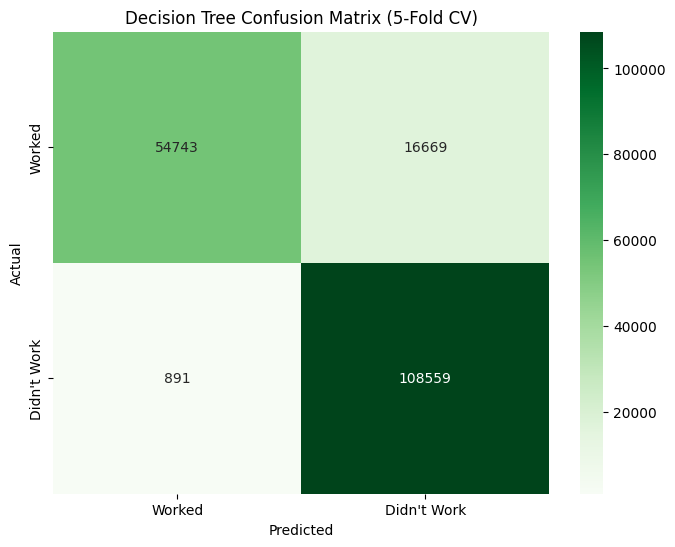

In [26]:
# Compute Confusion Matrix for Full Dataset (Using Cross-Val Predictions)
cm_tree = confusion_matrix(y_tree, y_pred_tree)  # ✅ Matches 5-Fold CV setup
class_labels = ["Worked", "Didn't Work"]

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix (5-Fold CV)")
plt.show()


Looking at the false positives **(891)** and false negatives **(16,669)**, we see a significant imbalance in errors. The false negatives are nearly **19x** higher than the false positives, indicating that the model struggles to correctly identify instances of class 1.

This is reflected in the recall score for class 1 (77%), meaning that nearly 1 in 4 actual 'worked' instances are misclassified as 'didn't work'. This hints that although the accuracy is fairly high, making the decision tree model much less reliable in terms of identifying class 1 which overall makes it unreliable given the initial results.

On the other hand, the low false positives (891) show that when the model does predict "worked," it is usually correct. However, the trade-off is that it underpredicts class 1 too aggressively, leading to a high number of false negatives.



### Neural Network

In [27]:
# Initialize lists to store all true labels and predictions
all_y_true_nn = []
all_y_scores_nn = []

# Cross-Validation Loop (Updated to store predictions)
for fold, (train_idx_nn, val_idx_nn) in enumerate(kf_nn.split(X_nn)):
    # Split Data
    X_train_nn, X_val_nn = X_nn[train_idx_nn], X_nn[val_idx_nn]
    y_train_nn, y_val_nn = y_nn[train_idx_nn], y_nn[val_idx_nn]

    # Initialize Model
    model_nn = NeuralNetwork()
    criterion_nn = nn.BCEWithLogitsLoss(pos_weight=class_weights_nn)
    optimizer_nn = torch.optim.Adam(model_nn.parameters(), lr=0.00005)

    # Train Model
    for epoch in range(epochs_nn):
        optimizer_nn.zero_grad()
        y_pred_nn = model_nn(X_train_nn)
        loss_nn = criterion_nn(y_pred_nn, y_train_nn)
        loss_nn.backward()
        optimizer_nn.step()

    # Compute Validation Predictions
    with torch.no_grad():
        y_val_pred_logits_nn = model_nn(X_val_nn)  # Raw logits
        y_val_pred_probs_nn = torch.sigmoid(y_val_pred_logits_nn)  # Convert to probabilities

        # Store results
        all_y_true_nn.append(y_val_nn.numpy())
        all_y_scores_nn.append(y_val_pred_probs_nn.numpy())

# Convert lists to numpy arrays
all_y_true_nn = np.concatenate(all_y_true_nn, axis=0).flatten()
all_y_scores_nn = np.concatenate(all_y_scores_nn, axis=0).flatten()

# Convert probabilities to class labels
all_y_pred_nn = (all_y_scores_nn >= 0.5).astype(int)

# Compute Classification Report and ROC-AUC
print("\nClassification Report:")
print(classification_report((all_y_true_nn.astype(int) + 1), (all_y_pred_nn.astype(int) + 1)))

roc_auc = roc_auc_score(all_y_true_nn, all_y_scores_nn)
print(f"\nROC-AUC Score: {roc_auc:.4f}")



Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.90      0.87     71412
           2       0.93      0.89      0.91    109450

    accuracy                           0.90    180862
   macro avg       0.89      0.90      0.89    180862
weighted avg       0.90      0.90      0.90    180862


ROC-AUC Score: 0.9456


The **precision** shows that 85% of the instances predicted to belong to class 1 indeed belonged to class 1. While 93% of the instances predicted to belong to class 2 indeed belonged to class 2.

The **recall** shows that of all the actual instances of class 1, 90% were correctly classified. While of all the actual instances of class 2, 89% were correctly classified.

The **F1-score** shows that there is a 87% balance between the precision and recall in class 1. While there is a 91% balance between the precision and recall in class 2.

The **ROC AUC score** of 94% which means the model does a good job in distinguishing what class an instance belongs to.

For this model, **class 1 is deemed to be a difficult class to predict** due to resulting to a lower precision and overall F1-score. While it did have a higher recall score, it wasn't significant enough to offset both the scores of the aforementioned metrics.

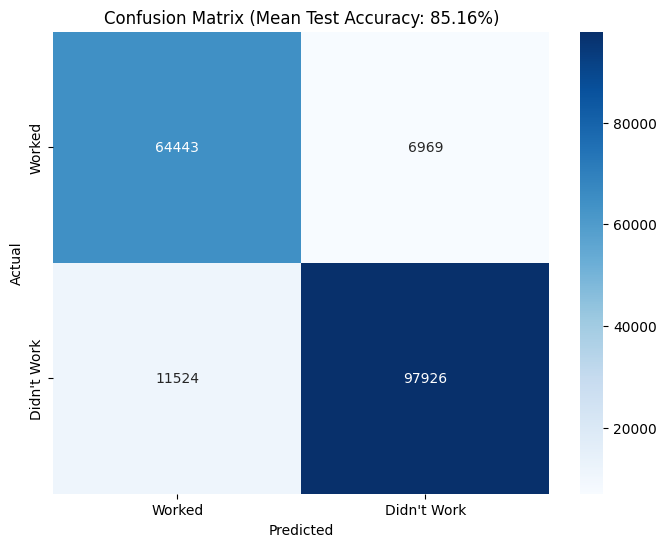

In [28]:
# Convert lists to numpy arrays for confusion matrix
all_y_true_nn = np.array(all_y_true_nn).astype(int) + 1  # Convert back to class labels (1, 2)
all_y_pred_nn = np.array(all_y_pred_nn).astype(int) + 1  # Convert back to class labels (1, 2)

# Compute Confusion Matrix
cm_nn = confusion_matrix(all_y_true_nn, all_y_pred_nn)

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=["Worked", "Didn't Work"], yticklabels=["Worked", "Didn't Work"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (Mean Test Accuracy: {mean_test_accuracy_nn:.2f}%)")
plt.show()

Looking at the false positives **(11,524)** and false negatives **(6,969)**, it's numerically noticeable that the higher number of false positives are higher which suggests that the model had a harder time trying to predict instances that "worked" when in reality those instances actually "didn't work". This means there is a slight difficulty in trying to predict class 2.

## Section 8. Improving Model Performance

Grid search was the method of hyperparameter tuning for all 3 models. It works by testing out every possible combinations of the hyperparameter values we gave it. Since we are also using 5-fold cross validation, each combination will undergo such validation process to ensure better generalization for every output accuracies.

### Binomial Logistic Regression

The hyperparameters we chose to tune for binomial logistic regression and their respective range of values are the following:

Learning rate schedule: constant, adaptive

Learning rate: 0.001, 0.0001, 0.0005

Maximum iterations: 200, 500, 1000

Tolerance: 0.001, 0.0001

In [29]:
# Define Hyperparameter Grid
param_grid = {
    "learning_rate": ["constant", "adaptive"],  
    "eta0": [0.0001, 0.0005, 0.001],  
    "max_iter": [200, 500, 1000],  
    "tol": [0.001, 0.0001]
}

# Prepare Dataset
X_sgd = cleaned_selected_df.drop('PUFC11_WORK', axis=1).values  
y_sgd = cleaned_selected_df['PUFC11_WORK'].values  

# Normalize Data
scaler_sgd = StandardScaler()
X_scaled_sgd = scaler_sgd.fit_transform(X_sgd)  # Fit on full dataset

# Initialize SGDClassifier
sgd_log_reg = SGDClassifier(loss="log_loss", class_weight="balanced", random_state=41)

# Grid Search with 5-Fold Cross Validation
kf_sgd = KFold(n_splits=5, shuffle=True, random_state=41)
grid_search_sgd = GridSearchCV(sgd_log_reg, param_grid, cv=kf_sgd, scoring="accuracy", n_jobs=-1, return_train_score=True)
grid_search_sgd.fit(X_scaled_sgd, y_sgd.ravel())  # Fit on full dataset

print("\nAll Tested Hyperparameter Configurations & Their Scores:")
for i, params in enumerate(grid_search_sgd.cv_results_['params']):
    mean_train_score_sgd = grid_search_sgd.cv_results_['mean_train_score'][i] * 100
    mean_val_score_sgd = grid_search_sgd.cv_results_['mean_test_score'][i] * 100
    print(f"Config {i+1}: {params} -> Train Acc: {mean_train_score_sgd:.4f}%, Test Acc: {mean_val_score_sgd:.4f}%")

# Best Parameters & Model
print("\nBest Hyperparameters:", grid_search_sgd.best_params_)
best_sgd = grid_search_sgd.best_estimator_

# Compute Both Training and Validation Accuracy for Each Fold
cv_results = cross_validate(best_sgd, X_scaled_sgd, y_sgd, cv=kf_sgd, return_train_score=True, scoring='accuracy')

train_scores = cv_results['train_score']
val_scores = cv_results['test_score']

# Generate Cross-Validation Predictions for Later Analysis
y_pred_sgd = cross_val_predict(best_sgd, X_scaled_sgd, y_sgd, cv=kf_sgd)  # Ensure compatibility with second snippet

# Print Accuracy Results
print("\nBest SGD Model Performance (After Grid Search)")
print(f"Training Accuracy per fold: {train_scores}")
print(f"Testing Accuracy per fold: {val_scores}")
print(f"Mean Training Accuracy: {np.mean(train_scores) * 100:.4f}%")
print(f"Mean Testing Accuracy: {np.mean(val_scores) * 100:.4f}%")


All Tested Hyperparameter Configurations & Their Scores:
Config 1: {'eta0': 0.0001, 'learning_rate': 'constant', 'max_iter': 200, 'tol': 0.001} -> Train Acc: 97.5954%, Test Acc: 97.5949%
Config 2: {'eta0': 0.0001, 'learning_rate': 'constant', 'max_iter': 200, 'tol': 0.0001} -> Train Acc: 97.5397%, Test Acc: 97.5302%
Config 3: {'eta0': 0.0001, 'learning_rate': 'constant', 'max_iter': 500, 'tol': 0.001} -> Train Acc: 97.5954%, Test Acc: 97.5949%
Config 4: {'eta0': 0.0001, 'learning_rate': 'constant', 'max_iter': 500, 'tol': 0.0001} -> Train Acc: 97.5397%, Test Acc: 97.5302%
Config 5: {'eta0': 0.0001, 'learning_rate': 'constant', 'max_iter': 1000, 'tol': 0.001} -> Train Acc: 97.5954%, Test Acc: 97.5949%
Config 6: {'eta0': 0.0001, 'learning_rate': 'constant', 'max_iter': 1000, 'tol': 0.0001} -> Train Acc: 97.5397%, Test Acc: 97.5302%
Config 7: {'eta0': 0.0001, 'learning_rate': 'adaptive', 'max_iter': 200, 'tol': 0.001} -> Train Acc: 97.5950%, Test Acc: 97.5893%
Config 8: {'eta0': 0.0001, 

### Decision Tree

The hyperparameters we chose to tune for the decision tree and their respective range of values are the following:

Maximum depth: 3, 5, 10

Pruning (ccp_alpha): 0.01, 0.03, 0.05

In [30]:
# Define hyperparameter grid
param_grid_tree = {
    "max_depth": [3, 5, 10],  # Controls tree depth (lower = less overfitting)
    "ccp_alpha": [0.01, 0.03, 0.05],  # Pruning parameter (higher = simpler tree)
}

# Prepare Dataset
X_tree = cleaned_selected_df.drop('PUFC11_WORK', axis=1).values  
y_tree = cleaned_selected_df['PUFC11_WORK'].values  

# Normalize Data (optional for trees, but keeping consistency)
scaler_tree = StandardScaler()
X_scaled_tree = scaler_tree.fit_transform(X_tree)  # Fit on full dataset

# Initialize Decision Tree Classifier
tree_clf = DecisionTreeClassifier(min_samples_split=2000, min_samples_leaf=500, max_features="sqrt", random_state=41)

# Define 5-Fold Cross-Validation
kf_tree = KFold(n_splits=5, shuffle=True, random_state=41)
grid_search_tree = GridSearchCV(tree_clf, param_grid_tree, cv=kf_tree, scoring="accuracy", n_jobs=-1, verbose=1, return_train_score=True)
grid_search_tree.fit(X_scaled_tree, y_tree)  # Fit on full dataset

print("\nAll Tested Hyperparameter Configurations & Their Scores:")
for i, params in enumerate(grid_search_tree.cv_results_['params']):
    mean_train_score_tree = grid_search_tree.cv_results_['mean_train_score'][i] * 100
    mean_val_score_tree = grid_search_tree.cv_results_['mean_test_score'][i] * 100
    print(f"Config {i+1}: {params} -> Train Acc: {mean_train_score_tree:.4f}%, Test Acc: {mean_val_score_tree:.4f}%")

# Best Parameters & Model
print("\nBest Hyperparameters:", grid_search_tree.best_params_)
best_tree_clf = grid_search_tree.best_estimator_

# Compute Accuracy for Best Model
cv_results_tree = cross_validate(best_tree_clf, X_scaled_tree, y_tree, cv=kf_tree, return_train_score=True, scoring='accuracy')

train_scores_tree = cv_results_tree['train_score']
val_scores_tree = cv_results_tree['test_score']

# Generate Cross-Validation Predictions
y_pred_tree = cross_val_predict(best_tree_clf, X_scaled_tree, y_tree, cv=kf_tree)

# Print Accuracy Results
print("\nBest Decision Tree Model Performance (After Grid Search)")
print(f"Training Accuracy per fold: {train_scores_tree}")
print(f"Testing Accuracy per fold: {val_scores_tree}")
print(f"Mean Training Accuracy: {np.mean(train_scores_tree) * 100:.4f}%")
print(f"Mean Testing Accuracy: {np.mean(val_scores_tree) * 100:.4f}%")

Fitting 5 folds for each of 9 candidates, totalling 45 fits

All Tested Hyperparameter Configurations & Their Scores:
Config 1: {'ccp_alpha': 0.01, 'max_depth': 3} -> Train Acc: 98.0538%, Test Acc: 98.0538%
Config 2: {'ccp_alpha': 0.01, 'max_depth': 5} -> Train Acc: 97.2026%, Test Acc: 97.1791%
Config 3: {'ccp_alpha': 0.01, 'max_depth': 10} -> Train Acc: 97.3516%, Test Acc: 97.3803%
Config 4: {'ccp_alpha': 0.03, 'max_depth': 3} -> Train Acc: 98.0538%, Test Acc: 98.0538%
Config 5: {'ccp_alpha': 0.03, 'max_depth': 5} -> Train Acc: 94.9290%, Test Acc: 94.9055%
Config 6: {'ccp_alpha': 0.03, 'max_depth': 10} -> Train Acc: 95.5625%, Test Acc: 95.5541%
Config 7: {'ccp_alpha': 0.05, 'max_depth': 3} -> Train Acc: 98.0538%, Test Acc: 98.0538%
Config 8: {'ccp_alpha': 0.05, 'max_depth': 5} -> Train Acc: 92.0157%, Test Acc: 91.9983%
Config 9: {'ccp_alpha': 0.05, 'max_depth': 10} -> Train Acc: 90.2909%, Test Acc: 90.2909%

Best Hyperparameters: {'ccp_alpha': 0.01, 'max_depth': 3}

Best Decision Tree

### Neural Network

The hyperparameters we chose to tune for the neural network and their respective range of values are the following:

Learning rate: 0.0001, 0.0005

Hidden layer 1 neurons: 128

Hidden layer 2 neurons: 64

Hidden layer 3 neurons: 32

In [31]:
# Define Neural Network Class
class NeuralNetwork(nn.Module):
    def __init__(self, inputL=15, h1=128, h2=64, h3=32, outputL=1):  # Default values for tuning params
        super().__init__()
        self.fc1 = nn.Linear(inputL, h1)
        self.bn1 = nn.BatchNorm1d(h1)  
        self.fc2 = nn.Linear(h1, h2)
        self.bn2 = nn.BatchNorm1d(h2)  
        self.fc3 = nn.Linear(h2, h3)
        self.bn3 = nn.BatchNorm1d(h3)  
        self.out = nn.Linear(h3, outputL)

    def forward(self, x):
        x = self.bn1(F.relu(self.fc1(x)))  
        x = self.bn2(F.relu(self.fc2(x)))  
        x = self.bn3(F.relu(self.fc3(x)))  
        x = self.out(x)  
        return x

torch.manual_seed(41)

# Load and Normalize Data
X_nn = cleaned_selected_df.drop('PUFC11_WORK', axis=1).values  
y_nn = cleaned_selected_df['PUFC11_WORK'].values  

scaler_nn = StandardScaler()
X_nn = scaler_nn.fit_transform(X_nn)

X_nn = torch.FloatTensor(X_nn)
y_nn = torch.FloatTensor(y_nn).unsqueeze(1) - 1  # Convert labels: 1 → 0, 2 → 1

# Compute Class Weights
y_np_nn = y_nn.numpy().flatten()
classes_nn = np.unique(y_np_nn)
class_weights_nn = compute_class_weight(class_weight="balanced", classes=classes_nn, y=y_np_nn)
adjusted_weight_nn = class_weights_nn[1] * 0.65  
class_weights_nn = torch.tensor([adjusted_weight_nn], dtype=torch.float32)

# Define Hyperparameter Grid (Only tuning lr, h1, h2, h3)
param_grid_nn = {
    "lr": [0.0001, 0.0005],  # Learning rate options
    "h1": [128],         # Hidden Layer 1 size 
    "h2": [64],          # Hidden Layer 2 size 
    "h3": [32],          # Hidden Layer 3 size
}

# Generate all hyperparameter combinations
param_combinations_nn = list(product(param_grid_nn["lr"], param_grid_nn["h1"], param_grid_nn["h2"], param_grid_nn["h3"]))

# Store Best Results
best_train_accuracy_nn = 0
best_test_accuracy_nn = 0
best_params_nn = None
epochs_nn = 100  # Fixed number of epochs

# Store all tested configurations and their scores
all_results_nn = []

# Perform Grid Search
kf_nn = KFold(n_splits=5, shuffle=True, random_state=41)

for params_nn in param_combinations_nn:
    lr_nn, h1_nn, h2_nn, h3_nn = params_nn
    print(f"\nTesting Hyperparameters: lr={lr_nn}, h1={h1_nn}, h2={h2_nn}, h3={h3_nn}")

    train_accuracies_nn = []
    val_accuracies_nn = []

    for fold_nn, (train_idx_nn, val_idx_nn) in enumerate(kf_nn.split(X_nn)):
        # Split Data
        X_train_nn, X_val_nn = X_nn[train_idx_nn], X_nn[val_idx_nn]
        y_train_nn, y_val_nn = y_nn[train_idx_nn], y_nn[val_idx_nn]

        # Initialize Model with hyperparameters
        model_nn = NeuralNetwork(h1=h1_nn, h2=h2_nn, h3=h3_nn)
        criterion_nn = nn.BCEWithLogitsLoss(pos_weight=class_weights_nn)
        optimizer_nn = torch.optim.Adam(model_nn.parameters(), lr=lr_nn)

        # Train Model
        for epoch in range(epochs_nn):
            optimizer_nn.zero_grad()
            y_pred_nn = model_nn(X_train_nn)
            loss_nn = criterion_nn(y_pred_nn, y_train_nn)
            loss_nn.backward()
            optimizer_nn.step()

        # Compute Training & Validation Accuracy
        with torch.no_grad():
            y_train_pred_nn = model_nn(X_train_nn)
            y_train_pred_class_nn = (torch.sigmoid(y_train_pred_nn) > 0.5).float()
            train_acc_nn = (y_train_pred_class_nn == y_train_nn).float().mean().item()

            y_val_pred_nn = model_nn(X_val_nn)
            y_val_pred_class_nn = (torch.sigmoid(y_val_pred_nn) > 0.5).float()
            val_acc_nn = (y_val_pred_class_nn == y_val_nn).float().mean().item()

        train_accuracies_nn.append(train_acc_nn)
        val_accuracies_nn.append(val_acc_nn)

    # Compute Mean Accuracies
    mean_train_acc_nn = np.mean(train_accuracies_nn) * 100
    mean_val_acc_nn = np.mean(val_accuracies_nn) * 100

    # Store results for printing later
    all_results_nn.append((params_nn, mean_train_acc_nn, mean_val_acc_nn))

    print(f"Train Acc: {mean_train_acc_nn:.4f}%, Test Acc: {mean_val_acc_nn:.4f}%")

    # Check if this is the best model
    if mean_val_acc_nn > best_test_accuracy_nn:
        best_test_accuracy_nn = mean_val_acc_nn
        best_train_accuracy_nn = mean_train_acc_nn
        best_params_nn = params_nn

# Print Best Parameters
print("\nBest Hyperparameters:")
print(f"Learning Rate: {best_params_nn[0]}")
print(f"h1: {best_params_nn[1]}")
print(f"h2: {best_params_nn[2]}")
print(f"h3: {best_params_nn[3]}")
print(f"Best Testing Accuracy: {best_train_accuracy_nn:.4f}%")
print(f"Best Training Accuracy: {best_test_accuracy_nn:.4f}%")



Testing Hyperparameters: lr=0.0001, h1=128, h2=64, h3=32
Train Acc: 97.0014%, Test Acc: 97.0215%

Testing Hyperparameters: lr=0.0005, h1=128, h2=64, h3=32
Train Acc: 98.4284%, Test Acc: 98.3855%

Best Hyperparameters:
Learning Rate: 0.0005
h1: 128
h2: 64
h3: 32
Best Testing Accuracy: 98.4284%
Best Training Accuracy: 98.3855%


## Section 9. Model Performance Summary

### Binomial Logistic Regression

**Best set of hyperparameters:**

Learning rate: 0.0001

Learning rate schedule: constant

Maximum iterations: 200

Tolerance: 0.001

In [32]:
# Ensure y_pred_sgd is generated using best_sgd
y_pred_sgd = cross_val_predict(best_sgd, X_scaled_sgd, y_sgd, cv=kf_sgd)

# Classification Report
print("\n**Classification Report (SGDClassifier - Best Tuned Model, 5-Fold CV)**")
print(classification_report(y_sgd, y_pred_sgd))  

# ROC-AUC Score (Using Predicted Probabilities)
y_pred_proba_sgd = cross_val_predict(best_sgd, X_scaled_sgd, y_sgd, cv=kf_sgd, method="predict_proba")[:, 1]
roc_auc_sgd = roc_auc_score(y_sgd, y_pred_proba_sgd)
print(f"ROC-AUC Score: {roc_auc_sgd:.4f}")

# Class Distribution in Predictions
unique, counts = np.unique(y_pred_sgd, return_counts=True)
class_distribution_sgd = {int(label): int(count) for label, count in zip(unique, counts)}

print("\n**Class Distribution in Predictions (SGDClassifier - Best Tuned Model, 5-Fold CV)**")
for label, count in class_distribution_sgd.items():
    print(f"Class {label}: {count}")


**Classification Report (SGDClassifier - Best Tuned Model, 5-Fold CV)**
              precision    recall  f1-score   support

           1       0.97      0.97      0.97     71412
           2       0.98      0.98      0.98    109450

    accuracy                           0.98    180862
   macro avg       0.98      0.97      0.97    180862
weighted avg       0.98      0.98      0.98    180862

ROC-AUC Score: 0.9928

**Class Distribution in Predictions (SGDClassifier - Best Tuned Model, 5-Fold CV)**
Class 1: 71006
Class 2: 109856


The **precision** shows that 97% of the instances predicted to belong to class 1 indeed belonged to class 1. Similarly, 98% of the instances predicted to belong to class 2 indeed belonged to class 2.

The **recall** shows that out of all the actual instances of class 1, 97% were correctly classified, while 98% of all actual instances of class 2 were correctly classified.

The **F1-score** indicates a strong balance between precision and recall, scoring 97% for class 1 and 98% for class 2, meaning the model achieves high overall classification performance.

The **ROC-AUC score** of 0.9928 suggests that the model has an excellent ability to distinguish between the two classes, performing near-perfect classification.

**Comparing each of these metrics to the error analysis from the initially trained binomial logistic regression model:**

 We can see a very similar performance in terms of its precision, with a slight improvement with regard to the amount of instances predicted to be in class 2 being actually from class 2 (97% to 98%). This means the model is able to slightly do a better job in predicting what class does an instance belong to.

 In terms of its recall, it had a slight improvement with regard to classifying instances belonging to class 1 (96% to 97%). This means the model is able to catch more instances of those who worked.

 The F1-score showed no improvement from the initial model. At best, this might mean there there are only marginal improvements in the model.

 Overall, the ROC-AUC score of 99% showed a minimal improvement but nonetheless better performance when classifying instances.

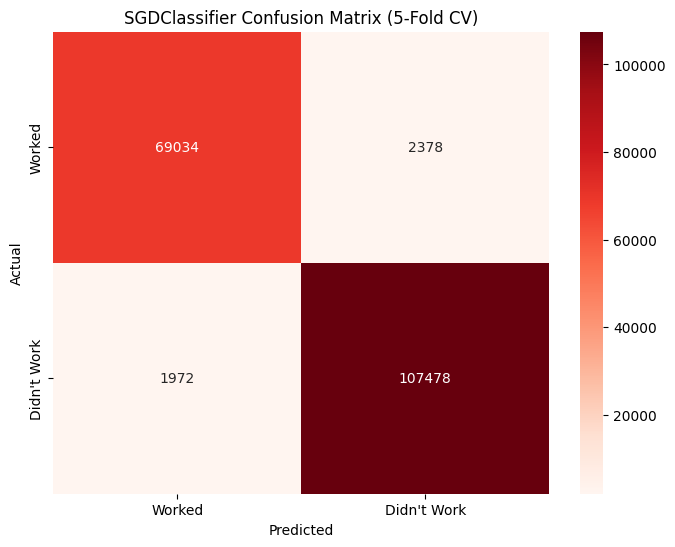

In [33]:
# Compute Confusion Matrix for Full Dataset (Using Cross-Val Predictions)
cm_sgd = confusion_matrix(y_sgd, y_pred_sgd)  # Matches 5-Fold CV setup
class_labels = ["Worked", "Didn't Work"]

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_sgd, annot=True, fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SGDClassifier Confusion Matrix (5-Fold CV)")
plt.show()

Initial false positives: 1957

Initial false negatives: 2765

New false positives 1972

New false negatives: 2378

This shift suggests that the model is improving its ability to correctly identify instances that didn't work, as indicated by the decrease in false negatives. Since recall measures how well the model captures actual positive cases, the improvement in recall aligns with this trend.

However, the slight increase in false positives means that while the model is reducing missed positive cases (false negatives), it's also making a few more incorrect positive predictions. This could indicate a trade-off between recall and precision, where improving recall slightly compromises precision to provide a more balanced improvement for the model's performance. 

Recall that class 1 was deemed to be the difficult class to classify from the initial training due to its lower recall, now with this newly tuned and improved model the recall score is slightly higher which is reflected with the lower count false negative present. 

### Decision Tree

**Best set of hyperparameters:**

Maximum depth: 3

Pruning (ccp_alpha): 0.01

In [34]:
# Classification Report
print("\nClassification Report (Decision Tree - 5-Fold CV)")
print(classification_report(y_tree, y_pred_tree)) 

# Use best_tree from GridSearchCV instead of tree_clf
y_pred_proba_tree = cross_val_predict(best_tree_clf, X_scaled_tree, y_tree, cv=kf_tree, method="predict_proba")[:, 1]
roc_auc_tree = roc_auc_score(y_tree, y_pred_proba_tree)
print(f"ROC-AUC Score: {roc_auc_tree}")

# Class Distribution in Predictions
unique, counts = np.unique(y_pred_tree, return_counts=True)
class_distribution_tree = {int(label): int(count) for label, count in zip(unique, counts)}

print("\n**Class Distribution in Predictions (Decision Tree - 5-Fold CV)**")
for label, count in class_distribution_tree.items():
    print(f"Class {label}: {count}")



Classification Report (Decision Tree - 5-Fold CV)
              precision    recall  f1-score   support

           1       0.98      0.97      0.98     71412
           2       0.98      0.99      0.98    109450

    accuracy                           0.98    180862
   macro avg       0.98      0.98      0.98    180862
weighted avg       0.98      0.98      0.98    180862

ROC-AUC Score: 0.9778972593729457

**Class Distribution in Predictions (Decision Tree - 5-Fold CV)**
Class 1: 70060
Class 2: 110802


The **precision** shows that 98% of the instances predicted to belong to class 1 indeed belonged to class 1. Similarly, 98% of the instances predicted to belong to class 2 were actually class 2.

The **recall** shows that out of all the actual instances of class 1, 97% were correctly classified, while out of all the actual instances of class 2, 99% were correctly classified.

The **F1-score** indicates that there is a 98% balance between precision and recall in both class 1 and class 2, meaning the model is performing well across both classes.

The **ROC AUC score** of 0.9779 suggests that the model is highly effective at distinguishing between the two classes, with strong classification ability.

**Comparing each of these metrics to the error analysis from the initially trained decision tree model:**

There is a noticeable improvement in terms of the precision performance of the model when it comes to classifying instances belonging to class 2 (from 87% to 98%) while classifying instances belonging to class 1 remained relatively the same. This means the model makes very few false positive errors.


For recall performance, there's a significant improvement in correctly classifying instances of class 1 (from 77% to 97%). This means the model is more capable of catching instances who worked. In other words, the model is highly effective at capturing true positives, reducing false negatives significantly.

The F1-score showed improvements for both classes (86% to 98% for class 1 and 93% to 98% for class 2). This means the model's performance for precision and recall is not only accurate but also maintains a strong equilibrium between these two key metrics.

Overall, the ROC-AUC score of 97% reflects the broad improvements of the decision tree model as a whole.

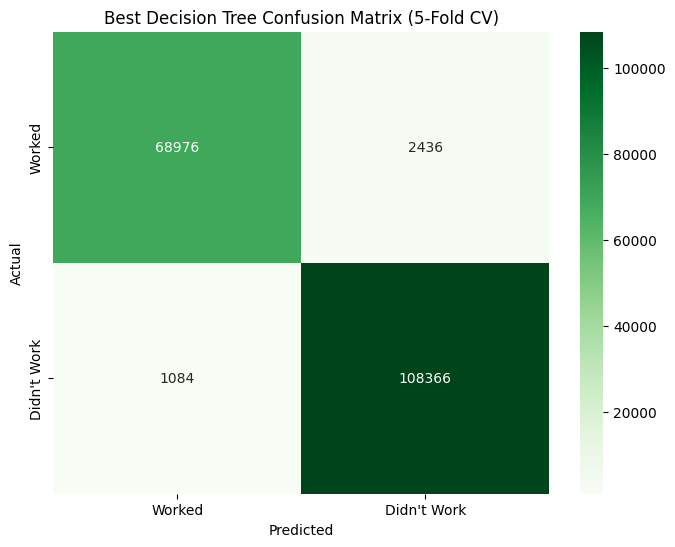

In [35]:
# Compute Confusion Matrix for Full Dataset (Using Cross-Val Predictions from Best Model)
cm_tree = confusion_matrix(y_tree, y_pred_tree)  # Matches 5-Fold CV setup
class_labels = ["Worked", "Didn't Work"]

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Best Decision Tree Confusion Matrix (5-Fold CV)")
plt.show()

Initial false positives: 891

Initial false negatives: 16669

New false positives 1084

New false negatives: 2436

It is immediately noticeable that there is a significant decrease in false negative predictions in comparison to the initial model training. This is aligned with the improvement in the recall performance of the model which went up by 20%, allowing the model to capture instances that actually worked.

Similar to the binomial logistic regression model, the decision tree model had a marginal increase with its true positives. This showcases another trade-off in an attempt to optimize the model overall. Despite this marginal increase in false positives, the substantial reduction in false negatives far outweighs the drawbacks. This means the model is now much less likely to miss actual "Worked" cases, which is often a more critical error in many real-world applications.

Remember that class 1 was the difficult class to predict in this model during its initial training due to its significantly lower recall score that is 20% lower than class 2. Now that the model has been tuned, the difference went down to a measly 2% difference. Despite still being lower than class 2's recall, the lower presence of false negatives reflects the improved capability of the decision tree model.

### Neural Network

**Best set of hyperparameters:**

Learning rate: 0.0005

Hidden layer 1 neurons: 128

Hidden layer 2 neurons: 64

Hidden layer 3 neurons: 32

In [36]:
# Best hyperparameters from grid search
best_lr, best_h1, best_h2, best_h3 = best_params_nn  

# Retrain the Model with Best Hyperparameters on Entire Dataset
model_best_nn = NeuralNetwork(h1=best_h1, h2=best_h2, h3=best_h3)
criterion_best_nn = nn.BCEWithLogitsLoss(pos_weight=class_weights_nn)
optimizer_best_nn = torch.optim.Adam(model_best_nn.parameters(), lr=best_lr)

# Train the Best Model
epochs_best_nn = 100  # Fixed number of epochs

for epoch in range(epochs_best_nn):
    optimizer_best_nn.zero_grad()
    y_pred_nn = model_best_nn(X_nn)
    loss_best_nn = criterion_best_nn(y_pred_nn, y_nn)
    loss_best_nn.backward()
    optimizer_best_nn.step()

# Compute Predictions on the Full Dataset
with torch.no_grad():
    y_pred_logits_nn = model_best_nn(X_nn)  # Raw logits
    y_pred_probs_nn = torch.sigmoid(y_pred_logits_nn)  # Convert to probabilities

# Convert to Numpy Arrays
all_y_true_nn = y_nn.numpy().flatten()
all_y_scores_nn = y_pred_probs_nn.numpy().flatten()

# Convert probabilities to class labels
all_y_pred_nn = (all_y_scores_nn >= 0.5).astype(int)

# Compute Classification Report and ROC-AUC Score
print("\nClassification Report:")
print(classification_report((all_y_true_nn.astype(int) + 1), (all_y_pred_nn.astype(int) + 1)))

roc_auc = roc_auc_score(all_y_true_nn, all_y_scores_nn)
print(f"\nROC-AUC Score: {roc_auc:.4f}")



Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.98      0.98     71412
           2       0.99      0.98      0.99    109450

    accuracy                           0.98    180862
   macro avg       0.98      0.98      0.98    180862
weighted avg       0.98      0.98      0.98    180862


ROC-AUC Score: 0.9973


The precision shows that 97% of the instances predicted to belong to class 1 (Worked) were actually class 1, while 99% of the instances predicted to belong to class 2 (Didn't Work) were actually class 2.

The recall shows that 98% of actual class 1 instances were correctly classified, and 98% of actual class 2 instances were correctly classified. This indicates that the model is highly effective at capturing true positives, leading to fewer false negatives.

The F1-score demonstrates a 98% balance between precision and recall in class 1 and a 99% balance in class 2, meaning the model maintains strong accuracy while avoiding a trade-off between precision and recall.

The ROC AUC score of 99% suggests that the model has an exceptional ability to distinguish between the two classes, making it a highly reliable and robust classifier.

**Comparing each of these metrics to the error analysis from the initially trained neural network model:**

The precision in predicting class 1 and class 2 both improved from 85% to 97% and 93% to 99% respectively. This means the neural network is now much better at correctly classifying instances, with fewer false positives. In other words, the model is less likely to mistakenly classify a "Didn't Work" instance as "Worked" and vice versa.

The recall both improved significantly as well for both class 1 and 2 coming from 90% to 98% and 89% to 98% respectively. This means the model is now better at capturing true positives, effectively reducing false negatives

The F1-score also improved for both class 1 and 2 coming from 87% to 98% and 91% to 99% respectively. This indicates good balance for both the precision and recall aspects of the model.

Likewise, the ROC-AUC score of 99% reflects the improvement of the model's overall performance in our binary classification task.

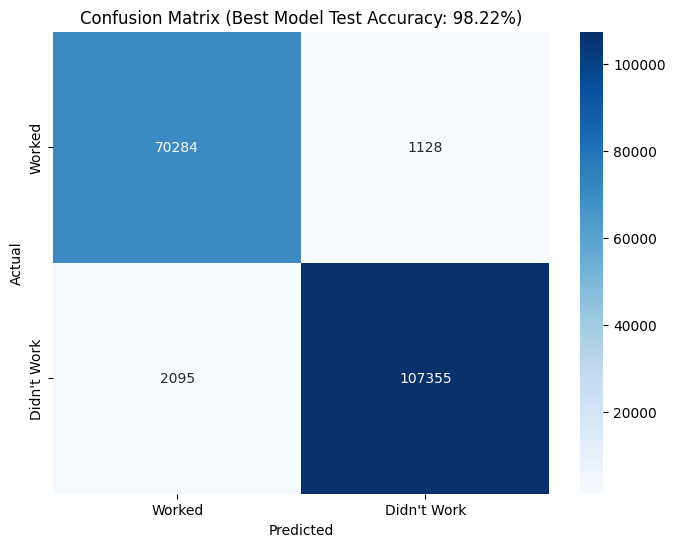

In [37]:
# Convert lists to numpy arrays for confusion matrix using the best model
all_y_true_nn = y_nn.numpy().flatten().astype(int) + 1  # Convert back to class labels (1, 2)
all_y_pred_nn = (y_pred_probs_nn.numpy().flatten() >= 0.5).astype(int) + 1  # Convert back to class labels (1, 2)

# Compute Confusion Matrix
cm_nn = confusion_matrix(all_y_true_nn, all_y_pred_nn)

# Compute Mean Test Accuracy for the Best Model
mean_test_accuracy_nn = (cm_nn.diagonal().sum() / cm_nn.sum()) * 100  # Compute accuracy from confusion matrix

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=["Worked", "Didn't Work"], yticklabels=["Worked", "Didn't Work"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (Best Model Test Accuracy: {mean_test_accuracy_nn:.2f}%)")
plt.show()

Initial false positives: 11524

Initial false negatives: 6969

New false positives 2095

New false negatives: 1128

The neural network model was able to optimize its classification capabilities, effectively reducing both type I and type II errors without compromising each other as seen in the confusion matrix. Compared to the previous two models, performing hyperparameter tuning on the neural network did not come with a compromise in the form of having an increase in either the type I or II error while the other error gets reduced. This means neural network can be one of the best suited machine learning models given the specific dataset and classification task.

Tuning the neural network model allowed it to improve all of its metrics for both classes, more specifically class 1's precision and F1-scores. These two metrics were initially low which caused high amount of false negatives. But with the newly tuned model, it is evident that there is a drop not just with the presence of false negatives but also with the false positives.

## Section 10. Insights and Conclusions

Training the three different models allowed us to realize that there are several factors that could have influenced the results from the initial trainings up to the improved trainings. For example, there seems to be a data imbalance for the label PUFC11_WORK which we were trying to predict. This may have been due to our method of data cleaning which was categorical imputation. This may have caused unnecessary bias which we have regulated by utilizing different optimizers and adjusting weights of the different models. This not only dealt with the imbalance but it also contributed into the better generalization of every model. 

Another influence to the varying accuracies by the three models are the different sensitivities toward dealing with feature interactions. For example, using Stochastic Gradient Descent with **binomial logistic regression** assumes a linear relationship between the label and features. This means any features that are differently scaled must be controlled prior to training the model. Otherwise, it could have trouble long training times or even failure to converge. 

**Decision trees** is inherently good in capturing feature interactions through the splits it undergoes. This may explain why it had a high accuracy initially which led to us having to optimize it for better generalization prior to making any other improvements. 

**Neural networks** on the other hand was not only flexible but also adaptable with complex feature interactions which is why it may have been the only model among the three that did not result to any drawback in terms of false positives upon improving it. 

A few **recommendations** for improvements of the models could be different preprocessing techniques to deal with the missing data which could prevent class imbalance. Another method of hyperparameter tuning could also be explored since grid search is quite exhaustive and dependant to the hyperparameter values given to it. 

## Section 11. References

**Used the following to help make a neural network model:**

Codemy.com. (2023, Jun 6). Create a Basic Neural Network Model - Deep Learning with PyTorch 5 [Video]. YouTube. https://www.youtube.com/watch?v=JHWqWIoac2I

Codemy.com. (2023, Jun 13). Load Data and Train Neural Network Model - Deep Learning with PyTorch 6 [Video]. YouTube. https://www.youtube.com/watch?v=Xp0LtPBcos0

Codemy.com. (2023, Jun 20). Evaluate Test Data Set On Network - Deep Learning with PyTorch 7 [Video]. YouTube. https://www.youtube.com/watch?v=rgBu8CbH9XY

**Used for preventing overfitting in decision tree model:**

GeeksforGeeks. (2024, May 2). Overfitting in Decision Tree Models. https://www.geeksforgeeks.org/overfitting-in-decision-tree-models/

**Used to apply K-fold Cross Validation in both the initial and improved models:**

GeeksforGeeks. (2024, November 12). How to Use KFold CrossValidation in a Neural Network. https://www.geeksforgeeks.org/how-to-use-k-fold-cross-validation-in-a-neural-network/

**Used as a guide to implement logistic regression model:**

Kindson The Genius. (2019, Sep 27). Logistic Regression in Python Step by Step in 10 minutes [Video]. YouTube. https://www.youtube.com/watch?v=HYcXgN9HaTM